In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Ranjith Acharya\Desktop\projects\Project to do\ML\Car-Price-Prediction-master\Car-Price-Prediction(prac)\Car_details.csv')

In [3]:
df.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
df.shape

(8128, 13)

In [6]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
# Droping the null values
df = df.dropna()
df = df.reset_index(drop=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   object 
 9   engine         7906 non-null   object 
 10  max_power      7906 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 803.1+ KB


#### Seperating integer value from festures : mileage, engine, max_power


In [9]:
a=df['engine']

d =[]
for x in a:
    b =""
    for y in x:
        if y in ['0','1','2','3','4','5','6','7','8','9']:
            b = b+y
        else:
            d.append(int(b))
            break

In [10]:
a=df['mileage']

c=[]
for x in a:
    b=''
    for y in x:
        if y in ['0','1','2','3','4','5','6','7','8','9','.']:
            b=b+y
        else:
            c.append(float(b))
            break

In [11]:
a=df['max_power']

s=[]
for x in a:
    b=''
    for y in x:
        if y in ['0','1','2','3','4','5','6','7','8','9','.']:
            b=b+y
        else:
            s.append(float(b))
            break

In [12]:


df['engine_cc']=d
df=df.drop('engine',axis=1)

df['mileage_kmpl']=c
df=df.drop('mileage',axis=1)

df['max_power_bhp']=s
df=df.drop('max_power',axis=1)

df=df.drop(['name','torque'],axis=1)
df

year  selling_price  km_driven    fuel seller_type transmission  \
0     2014         450000     145500  Diesel  Individual       Manual   
1     2014         370000     120000  Diesel  Individual       Manual   
2     2006         158000     140000  Petrol  Individual       Manual   
3     2010         225000     127000  Diesel  Individual       Manual   
4     2007         130000     120000  Petrol  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
7901  2013         320000     110000  Petrol  Individual       Manual   
7902  2007         135000     119000  Diesel  Individual       Manual   
7903  2009         382000     120000  Diesel  Individual       Manual   
7904  2013         290000      25000  Diesel  Individual       Manual   
7905  2013         290000      25000  Diesel  Individual       Manual   

                     owner  seats  engine_cc  mileage_kmpl  max_power_bhp  
0              First Owner    5.0       1248         23.40          74.00  
1             Second Owner    5.0       1498         21.14         103.52  
2              Third Owner    5.0       1497         17.70          78.00  
3              First Owner    5.0       1396         23.00          90.00  
4              First Owner    5.0       1298         16.10          88.20  
...                    ...    ...        ...           ...            ...  
7901           First Owner    5.0       1197         18.50          82.85  
7902  Fourth & Above Owner    5.0       1493         16.80         110.00  
7903           First Owner    5.0       1248         19.30          73.90  
7904           First Owner    5.0       1396         23.57          70.00  
7905           First Owner    5.0       1396         23.57          70.00  

[7906 rows x 11 columns]

#### Removing outlier in target variable

C:\Users\Ranjith Acharya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

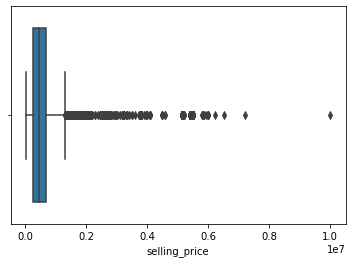

In [13]:
sns.boxplot(df.selling_price)

C:\Users\Ranjith Acharya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

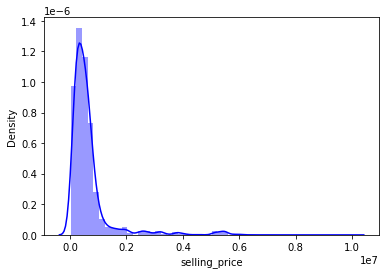

In [14]:
sns.distplot(df['selling_price'],color='blue')

In [15]:
#finding IQR
Q1=df['selling_price'].quantile(0.25)
Q3=df['selling_price'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

420000.0


In [16]:
df=df[~((df['selling_price']<(Q1-1.5*IQR))|(df['selling_price']>(Q3+1.5*IQR)))]

C:\Users\Ranjith Acharya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

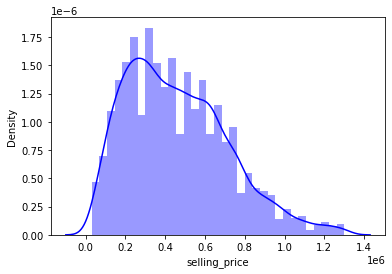

In [17]:
sns.distplot(df['selling_price'],color='blue')

In [18]:
df

year  selling_price  km_driven    fuel seller_type transmission  \
0     2014         450000     145500  Diesel  Individual       Manual   
1     2014         370000     120000  Diesel  Individual       Manual   
2     2006         158000     140000  Petrol  Individual       Manual   
3     2010         225000     127000  Diesel  Individual       Manual   
4     2007         130000     120000  Petrol  Individual       Manual   
...    ...            ...        ...     ...         ...          ...   
7901  2013         320000     110000  Petrol  Individual       Manual   
7902  2007         135000     119000  Diesel  Individual       Manual   
7903  2009         382000     120000  Diesel  Individual       Manual   
7904  2013         290000      25000  Diesel  Individual       Manual   
7905  2013         290000      25000  Diesel  Individual       Manual   

                     owner  seats  engine_cc  mileage_kmpl  max_power_bhp  
0              First Owner    5.0       1248         23.40          74.00  
1             Second Owner    5.0       1498         21.14         103.52  
2              Third Owner    5.0       1497         17.70          78.00  
3              First Owner    5.0       1396         23.00          90.00  
4              First Owner    5.0       1298         16.10          88.20  
...                    ...    ...        ...           ...            ...  
7901           First Owner    5.0       1197         18.50          82.85  
7902  Fourth & Above Owner    5.0       1493         16.80         110.00  
7903           First Owner    5.0       1248         19.30          73.90  
7904           First Owner    5.0       1396         23.57          70.00  
7905           First Owner    5.0       1396         23.57          70.00  

[7308 rows x 11 columns]

In [19]:
from pandas_profiling import profile_report

df.profile_report()

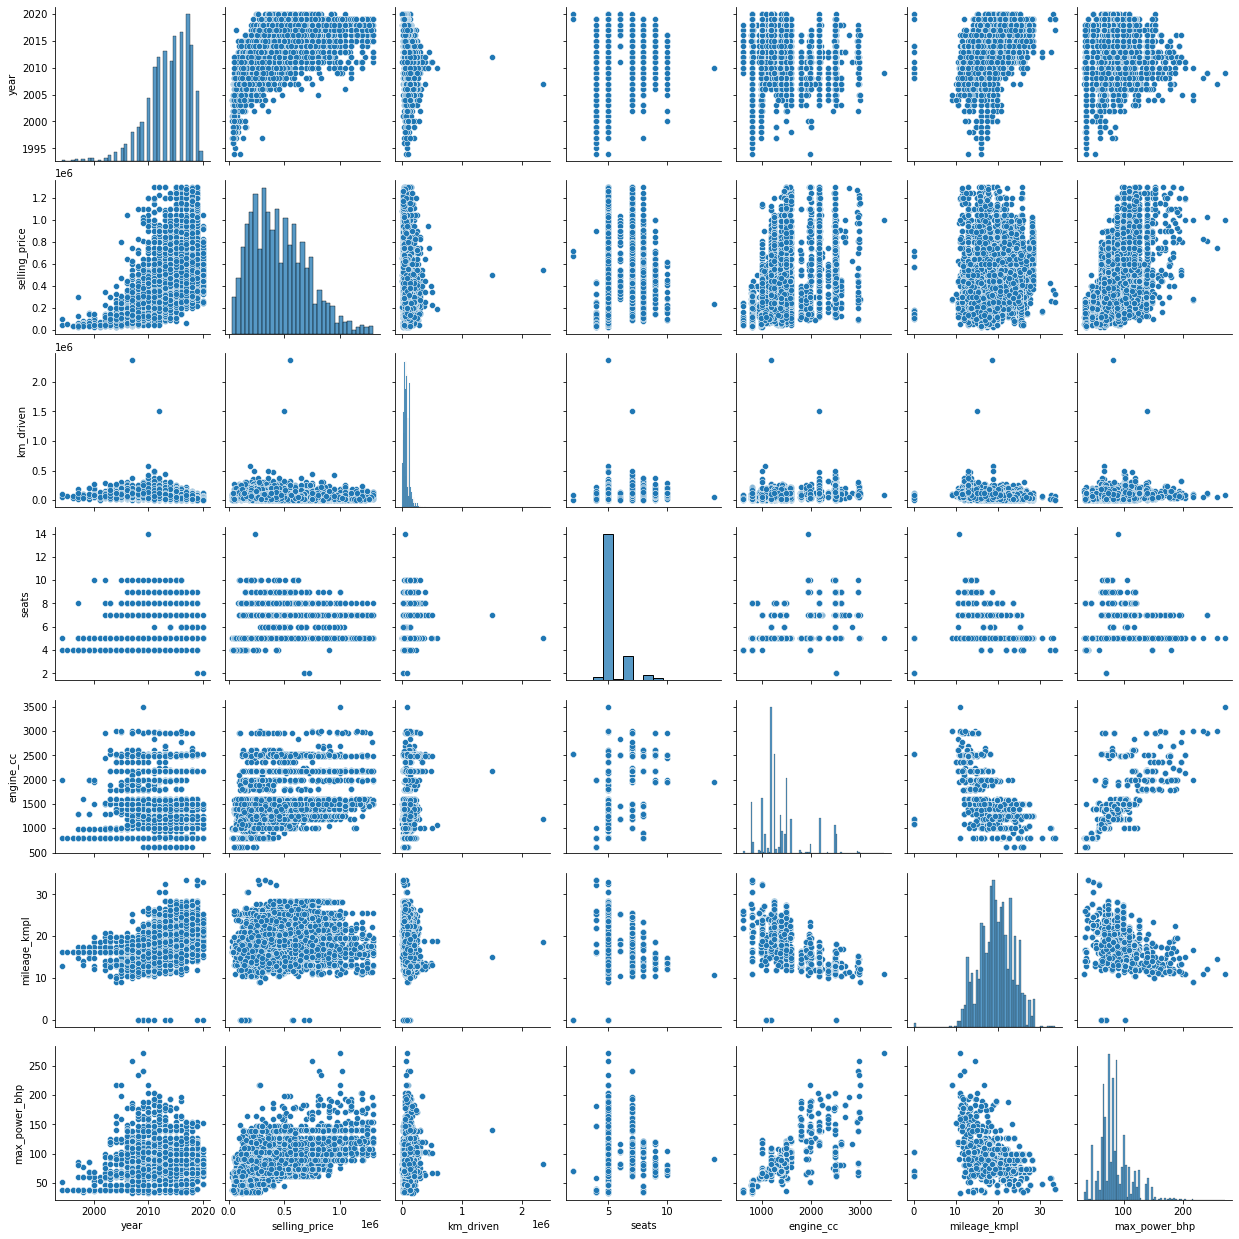

In [20]:
sns.pairplot(df)

<AxesSubplot:>

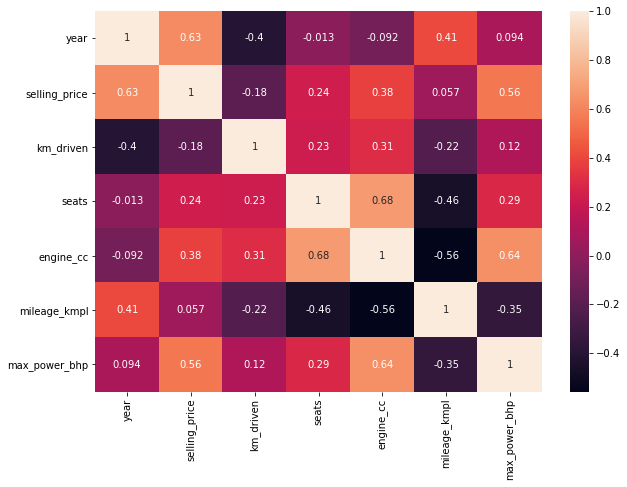

In [21]:

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

#### Categorical variable unique values

In [22]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [23]:
df.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [24]:
df.transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
df['owner'].unique()


array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

In [26]:
# Replacin the 'Fourth & Above Owner' with 'Third Owner'

df['owner'].replace('Fourth & Above Owner','Third Owner',inplace=True)

C:\Users\Ranjith Acharya\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [27]:
df.head(3)

year  selling_price  km_driven    fuel seller_type transmission  \
0  2014         450000     145500  Diesel  Individual       Manual   
1  2014         370000     120000  Diesel  Individual       Manual   
2  2006         158000     140000  Petrol  Individual       Manual   

          owner  seats  engine_cc  mileage_kmpl  max_power_bhp  
0   First Owner    5.0       1248         23.40          74.00  
1  Second Owner    5.0       1498         21.14         103.52  
2   Third Owner    5.0       1497         17.70          78.00

In [28]:
# Create dummies for categorical variables

#df_categorical=df.select_dtypes(include='O')
#df_cat=pd.get_dummies(df_categorical,drop_first=True)
#df=df.drop(['fuel','seller_type','transmission','owner'])
#df=pd.concat([df,df_cat],axis=1)


df=pd.get_dummies(df,drop_first=True)

In [29]:
df

year  selling_price  km_driven  seats  engine_cc  mileage_kmpl  \
0     2014         450000     145500    5.0       1248         23.40   
1     2014         370000     120000    5.0       1498         21.14   
2     2006         158000     140000    5.0       1497         17.70   
3     2010         225000     127000    5.0       1396         23.00   
4     2007         130000     120000    5.0       1298         16.10   
...    ...            ...        ...    ...        ...           ...   
7901  2013         320000     110000    5.0       1197         18.50   
7902  2007         135000     119000    5.0       1493         16.80   
7903  2009         382000     120000    5.0       1248         19.30   
7904  2013         290000      25000    5.0       1396         23.57   
7905  2013         290000      25000    5.0       1396         23.57   

      max_power_bhp  fuel_Diesel  fuel_LPG  fuel_Petrol  \
0             74.00            1         0            0   
1            103.52            1         0            0   
2             78.00            0         0            1   
3             90.00            1         0            0   
4             88.20            0         0            1   
...             ...          ...       ...          ...   
7901          82.85            0         0            1   
7902         110.00            1         0            0   
7903          73.90            1         0            0   
7904          70.00            1         0            0   
7905          70.00            1         0            0   

      seller_type_Individual  seller_type_Trustmark Dealer  \
0                          1                             0   
1                          1                             0   
2                          1                             0   
3                          1                             0   
4                          1                             0   
...                      ...                           ...   
7901                       1                             0   
7902                       1                             0   
7903                       1                             0   
7904                       1                             0   
7905                       1                             0   

      transmission_Manual  owner_Second Owner  owner_Third Owner  
0                       1                   0                  0  
1                       1                   1                  0  
2                       1                   0                  1  
3                       1                   0                  0  
4                       1                   0                  0  
...                   ...                 ...                ...  
7901                    1                   0                  0  
7902                    1                   0                  1  
7903                    1                   0                  0  
7904                    1                   0                  0  
7905                    1                   0                  0  

[7308 rows x 15 columns]

In [30]:
# Converting Years 

df['year_old']=2021-df['year']
df.drop('year',axis=1,inplace=True)
df.head(1)

selling_price  km_driven  seats  engine_cc  mileage_kmpl  max_power_bhp  \
0         450000     145500    5.0       1248          23.4           74.0   

   fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0            1         0            0                       1   

   seller_type_Trustmark Dealer  transmission_Manual  owner_Second Owner  \
0                             0                    1                   0   

   owner_Third Owner  year_old  
0                  0         7

#### Splitting the data

In [31]:
x=df.drop('selling_price',axis=1)

#y=df.iloc[:,1]
y=df['selling_price']

#### Scaling the Data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_scaled=pd.DataFrame(x_scaled)
x_scaled.columns=x.columns
x=x_scaled

In [34]:
#### Spliting the Data into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
lm=LinearRegression()

lm.fit(x_train,y_train)


LinearRegression()

In [37]:
# prediction
pred=lm.predict(x_test)


In [98]:
# Performance metrics

print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('R^2:',metrics.r2_score(y_test,pred))

MAE: 108303.59143931927
R^2: 0.6752513864536407


In [39]:
# Evaluating model for trainset

train_pred=lm.predict(x_train)

print('MAE:', metrics.mean_absolute_error(y_train,train_pred))
print('R^2:',metrics.r2_score(y_train,train_pred))


MAE: 106533.56259094627
R^2: 0.700681194570335


Training and Test score are allmost same, so no Overfitting

<s>

C:\Users\Ranjith Acharya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'y_test-predicted')

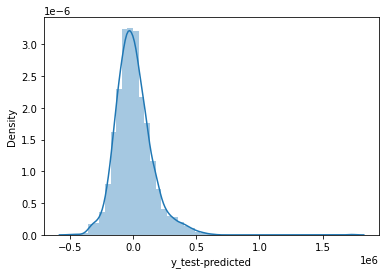

In [40]:


sns.distplot(y_test-pred,bins=50)
plt.xlabel('y_test-predicted')

The first assumption seems to be met.

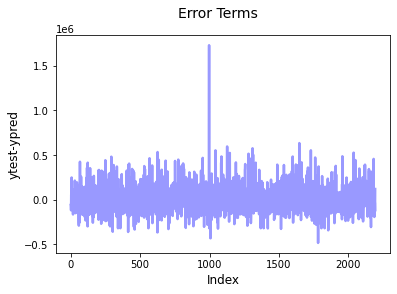

In [41]:
# Assumption 2: Homoscedasticity, i.e. the variance of the error term (y_true-y_pred) is constant.
c=[i for i in range (len(pred))]

fig=plt.figure()
plt.plot(c,y_test-pred,linewidth=2.5,color='b',alpha=0.4)
fig.suptitle('Error Terms', fontsize=14)               
plt.xlabel('Index', fontsize=12)                      
plt.ylabel('ytest-ypred', fontsize=12)                
plt.show()

The second assumption seems to be met.

<AxesSubplot:>

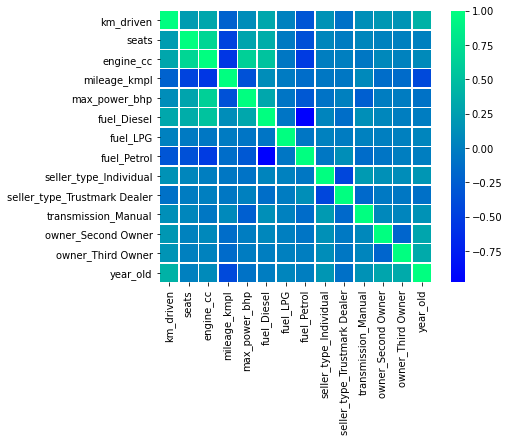

In [42]:
# Assumption 3: There is little correlation between the predictors. i.e., Multicollinearity:

#a=x.corr()
#mask_2 = np.triu(np.ones_like(a, dtype=bool))
#sns.heatmap(a,mask=mask_2,linewidths=0.5,square=True)
plt.figure(figsize=(7,5))
sns.heatmap(x.corr(),linewidths=0.5,cmap='winter',square=True)

Some features are highly correlated. So let's check the multicolliearity by VIF.

In [43]:
# Check for the VIF value for feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
# creat the DataFrame that will contain the names of all the features variables and respective VIF values

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=np.round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

Features    VIF
7                    fuel_Petrol  35.41
5                    fuel_Diesel  34.75
2                      engine_cc   4.95
3                   mileage_kmpl   3.11
1                          seats   2.18
13                      year_old   2.07
4                  max_power_bhp   2.00
0                      km_driven   1.69
6                       fuel_LPG   1.61
8         seller_type_Individual   1.32
9   seller_type_Trustmark Dealer   1.28
12             owner_Third Owner   1.27
11            owner_Second Owner   1.25
10           transmission_Manual   1.18

"fuel_Petrol" shows the highest VIF, so let's delete it.

In [45]:
x=x.drop(['fuel_Diesel'],axis=1)

In [46]:
x.head()

km_driven     seats  engine_cc  mileage_kmpl  max_power_bhp  fuel_LPG  \
0   1.278960 -0.424401  -0.323108      0.937956      -0.414701 -0.069371   
1   0.835945 -0.424401   0.224318      0.368121       0.737852 -0.069371   
2   1.183408 -0.424401   0.222129     -0.499240      -0.258529 -0.069371   
3   0.957557 -0.424401   0.000968      0.837100       0.209989 -0.069371   
4   0.835945 -0.424401  -0.213623     -0.902663       0.139711 -0.069371   

   fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0    -0.933770                0.393068                     -0.169459   
1    -0.933770                0.393068                     -0.169459   
2     1.070928                0.393068                     -0.169459   
3    -0.933770                0.393068                     -0.169459   
4     1.070928                0.393068                     -0.169459   

   transmission_Manual  owner_Second Owner  owner_Third Owner  year_old  
0              0.28891           -0.606863          -0.316917 -0.073444  
1              0.28891            1.647817          -0.316917 -0.073444  
2              0.28891           -0.606863           3.155396  1.996879  
3              0.28891           -0.606863          -0.316917  0.961718  
4              0.28891           -0.606863          -0.316917  1.738089

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [114]:
lm=LinearRegression()

lm.fit(x_train,y_train)

# prediction
lr_pred=lm.predict(x_test)

In [115]:
# Performance metrics

lr_mae=metrics.mean_absolute_error(y_test,lr_pred)
lr_r2=metrics.r2_score(y_test,lr_pred)

print('MAE :',lr_mae)
print('R2 :',lr_r2)

MAE : 108303.59143931927
R2 : 0.6752513864536407


There no significant chance in R2 value

### RanomForest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [51]:
reg=RandomForestRegressor()

n_estimators=[int(i) for i in np.linspace(100,1200,12)]
max_depth=[int(i) for i in np.linspace(5,50,10)]
min_samples_split=[2,5,10,15,20,100]
min_samples_leaf=[1,2,5,10]
max_features=["auto", "sqrt"]
    
param={'n_estimators':n_estimators,
      'max_depth':max_depth,
      'min_samples_split':min_samples_split,
      'min_samples_leaf':min_samples_leaf,
      'max_features':max_features}

In [52]:
random_reg=RandomizedSearchCV(reg,param_distributions=param,n_iter=15,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,
                             verbose=2,random_state=52)

random_reg.fit(x_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=52, scoring='neg_mean_squared_error',
                   verbose=2)

In [53]:
print('best_parameters',random_reg.best_params_)
print('best_score',-random_reg.best_score_)

best_parameters {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 30}
best_score 7480229737.833219


In [54]:
## Initiate the best model

rf_best=RandomForestRegressor(n_estimators=1000, min_samples_split= 10, min_samples_leaf= 1,max_features= 'auto', max_depth=30)

In [55]:
# Fit the best model

rf_best.fit(x_train,y_train)

RandomForestRegressor(max_depth=30, min_samples_split=10, n_estimators=1000)

In [116]:
rf_predict=rf_best.predict(x_test)
rf_predict

array([322061.47066651, 680180.26267011, 489349.78777957, ...,
       363433.73658087, 129399.31334613, 659484.93806889])

In [117]:
rf_mae=metrics.mean_absolute_error(y_test,rf_predict)
rf_r2=metrics.r2_score(y_test,rf_predict)


print('MAE :',rf_mae)
print('R2 :',rf_r2)

MAE : 57635.16899947375
R2 : 0.892169293045184


C:\Users\Ranjith Acharya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

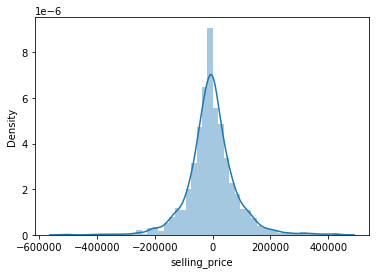

In [58]:
sns.distplot(y_test-rf_predict)

C:\Users\Ranjith Acharya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='selling_price'>

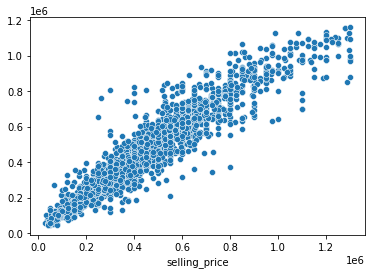

In [59]:
sns.scatterplot(y_test,rf_predict)

### XGB Regression

In [60]:
import xgboost as xgb
xgb_reg=xgb.XGBRegressor()

param={'n_estimators ':[int(i) for i in np.linspace(100,1200,12)],
       'max_depth ':[int(i) for i in np.linspace(5,50,10)],
       'learning_rate ':[0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
       'gamma':[ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
       'min_child_weight':[ 1, 3, 5, 7 ],
       'colsample_bytree':[ 0.3, 0.4, 0.5 , 0.7 ]}

In [61]:
random_xgb=RandomizedSearchCV(xgb_reg,param_distributions=param,n_iter=50,scoring='neg_mean_squared_error',n_jobs=-1,cv=5,
                             verbose=2,random_state=42)

random_xgb.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   53.3s finished


[10:40:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { learning_rate , max_depth , n_estimators  } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
      

In [62]:
print('best_parameters :',random_xgb.best_params_)
print('best_scores :',-random_xgb.best_score_)

best_parameters : {'n_estimators ': 400, 'min_child_weight': 7, 'max_depth ': 20, 'learning_rate ': 0.2, 'gamma': 0.0, 'colsample_bytree': 0.4}
best_scores : 7088175727.11544


In [63]:
xgb_predict=random_xgb.predict(x_test)

In [110]:
xgb_mae=metrics.mean_absolute_error(y_test,xgb_predict)
xgb_r2=metrics.r2_score(y_test,xgb_predict)

print('MAE :',xgb_mae)
print('R2 :',xgb_r2)

MAE : 58642.64840721899
R2 : 0.893235313388962


In [92]:
xgb_r2

### Deep Neural Network

In [74]:
from keras.models import Sequential
from keras.layers import Dense 

In [75]:
ann=Sequential()

ann.add(Dense(units=x_train.shape[1],activation='relu',kernel_initializer='normal'))
ann.add(Dense(16,activation='relu',kernel_initializer='normal'))
ann.add(Dense(16,activation='relu',kernel_initializer='normal'))
ann.add(Dense(1,activation='linear',kernel_initializer='normal'))

ann.compile(optimizer='adam',loss='mse')

In [76]:
ann.fit(x_train,y_train,batch_size=20,epochs=5000,verbose=2)

Epoch 1/5000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

256/256 - 0s - loss: 277167177728.0000
Epoch 2/5000
256/256 - 0s - loss: 275561709568.0000
Epoch 3/5000
256/256 - 0s - loss: 264688926720.0000
Epoch 4/5000
256/256 - 0s - loss: 233135964160.0000
Epoch 5/5000
256/256 - 0s - loss: 177256251392.0000
Epoch 6/5000
256/256 - 0s - loss: 111943843840.0000
Epoch 7/5000
256/256 - 0s - loss: 63915008000.0000
Epoch 8/5000
256/256 - 0s - loss: 42654724096.0000
Epoch 9/5000
256/256 - 0s - loss: 35728760832.0000
Epoch 10/5000
256/256 - 0s - loss: 32700004

256/256 - 0s - loss: 14648894464.0000
Epoch 145/5000
256/256 - 0s - loss: 14646583296.0000
Epoch 146/5000
256/256 - 0s - loss: 14645735424.0000
Epoch 147/5000
256/256 - 0s - loss: 14641263616.0000
Epoch 148/5000
256/256 - 0s - loss: 14627065856.0000
Epoch 149/5000
256/256 - 0s - loss: 14637196288.0000
Epoch 150/5000
256/256 - 0s - loss: 14632787968.0000
Epoch 151/5000
256/256 - 0s - loss: 14629806080.0000
Epoch 152/5000
256/256 - 0s - loss: 14622932992.0000
Epoch 153/5000
256/256 - 0s - loss: 14627606528.0000
Epoch 154/5000
256/256 - 0s - loss: 14618938368.0000
Epoch 155/5000
256/256 - 0s - loss: 14617734144.0000
Epoch 156/5000
256/256 - 0s - loss: 14610736128.0000
Epoch 157/5000
256/256 - 0s - loss: 14610365440.0000
Epoch 158/5000
256/256 - 0s - loss: 14611698688.0000
Epoch 159/5000
256/256 - 0s - loss: 14591690752.0000
Epoch 160/5000
256/256 - 0s - loss: 14598306816.0000
Epoch 161/5000
256/256 - 0s - loss: 14589346816.0000
Epoch 162/5000
256/256 - 0s - loss: 14606322688.0000
Epoch 16

Epoch 299/5000
256/256 - 0s - loss: 14164359168.0000
Epoch 300/5000
256/256 - 0s - loss: 14144352256.0000
Epoch 301/5000
256/256 - 0s - loss: 14163069952.0000
Epoch 302/5000
256/256 - 0s - loss: 14158814208.0000
Epoch 303/5000
256/256 - 0s - loss: 14153584640.0000
Epoch 304/5000
256/256 - 0s - loss: 14150597632.0000
Epoch 305/5000
256/256 - 0s - loss: 14144068608.0000
Epoch 306/5000
256/256 - 0s - loss: 14136270848.0000
Epoch 307/5000
256/256 - 0s - loss: 14133113856.0000
Epoch 308/5000
256/256 - 0s - loss: 14136908800.0000
Epoch 309/5000
256/256 - 0s - loss: 14127159296.0000
Epoch 310/5000
256/256 - 0s - loss: 14140542976.0000
Epoch 311/5000
256/256 - 0s - loss: 14128002048.0000
Epoch 312/5000
256/256 - 0s - loss: 14133411840.0000
Epoch 313/5000
256/256 - 0s - loss: 14131513344.0000
Epoch 314/5000
256/256 - 0s - loss: 14132501504.0000
Epoch 315/5000
256/256 - 0s - loss: 14120423424.0000
Epoch 316/5000
256/256 - 0s - loss: 14124068864.0000
Epoch 317/5000
256/256 - 0s - loss: 1412387430

Epoch 454/5000
256/256 - 0s - loss: 13723043840.0000
Epoch 455/5000
256/256 - 0s - loss: 13703328768.0000
Epoch 456/5000
256/256 - 0s - loss: 13727488000.0000
Epoch 457/5000
256/256 - 0s - loss: 13718942720.0000
Epoch 458/5000
256/256 - 0s - loss: 13717537792.0000
Epoch 459/5000
256/256 - 0s - loss: 13713481728.0000
Epoch 460/5000
256/256 - 0s - loss: 13710965760.0000
Epoch 461/5000
256/256 - 0s - loss: 13708683264.0000
Epoch 462/5000
256/256 - 0s - loss: 13714361344.0000
Epoch 463/5000
256/256 - 0s - loss: 13714900992.0000
Epoch 464/5000
256/256 - 0s - loss: 13720068096.0000
Epoch 465/5000
256/256 - 0s - loss: 13715139584.0000
Epoch 466/5000
256/256 - 0s - loss: 13711247360.0000
Epoch 467/5000
256/256 - 0s - loss: 13707555840.0000
Epoch 468/5000
256/256 - 0s - loss: 13705526272.0000
Epoch 469/5000
256/256 - 0s - loss: 13709659136.0000
Epoch 470/5000
256/256 - 0s - loss: 13703546880.0000
Epoch 471/5000
256/256 - 0s - loss: 13712283648.0000
Epoch 472/5000
256/256 - 0s - loss: 1370869555

Epoch 609/5000
256/256 - 0s - loss: 13602407424.0000
Epoch 610/5000
256/256 - 0s - loss: 13607232512.0000
Epoch 611/5000
256/256 - 0s - loss: 13610148864.0000
Epoch 612/5000
256/256 - 0s - loss: 13602062336.0000
Epoch 613/5000
256/256 - 0s - loss: 13596079104.0000
Epoch 614/5000
256/256 - 0s - loss: 13607261184.0000
Epoch 615/5000
256/256 - 0s - loss: 13598626816.0000
Epoch 616/5000
256/256 - 0s - loss: 13596708864.0000
Epoch 617/5000
256/256 - 0s - loss: 13607761920.0000
Epoch 618/5000
256/256 - 0s - loss: 13601811456.0000
Epoch 619/5000
256/256 - 0s - loss: 13599848448.0000
Epoch 620/5000
256/256 - 0s - loss: 13599132672.0000
Epoch 621/5000
256/256 - 0s - loss: 13598062592.0000
Epoch 622/5000
256/256 - 0s - loss: 13599663104.0000
Epoch 623/5000
256/256 - 0s - loss: 13603014656.0000
Epoch 624/5000
256/256 - 0s - loss: 13586555904.0000
Epoch 625/5000
256/256 - 0s - loss: 13589222400.0000
Epoch 626/5000
256/256 - 0s - loss: 13593675776.0000
Epoch 627/5000
256/256 - 0s - loss: 1358998220

Epoch 764/5000
256/256 - 0s - loss: 13521581056.0000
Epoch 765/5000
256/256 - 0s - loss: 13532767232.0000
Epoch 766/5000
256/256 - 0s - loss: 13531637760.0000
Epoch 767/5000
256/256 - 0s - loss: 13529011200.0000
Epoch 768/5000
256/256 - 0s - loss: 13529361408.0000
Epoch 769/5000
256/256 - 0s - loss: 13525864448.0000
Epoch 770/5000
256/256 - 0s - loss: 13525978112.0000
Epoch 771/5000
256/256 - 0s - loss: 13528009728.0000
Epoch 772/5000
256/256 - 0s - loss: 13526141952.0000
Epoch 773/5000
256/256 - 0s - loss: 13521067008.0000
Epoch 774/5000
256/256 - 0s - loss: 13540807680.0000
Epoch 775/5000
256/256 - 0s - loss: 13527891968.0000
Epoch 776/5000
256/256 - 0s - loss: 13517624320.0000
Epoch 777/5000
256/256 - 0s - loss: 13521430528.0000
Epoch 778/5000
256/256 - 0s - loss: 13525009408.0000
Epoch 779/5000
256/256 - 0s - loss: 13530252288.0000
Epoch 780/5000
256/256 - 0s - loss: 13523045376.0000
Epoch 781/5000
256/256 - 0s - loss: 13521071104.0000
Epoch 782/5000
256/256 - 0s - loss: 1353831424

Epoch 919/5000
256/256 - 0s - loss: 13484974080.0000
Epoch 920/5000
256/256 - 0s - loss: 13496260608.0000
Epoch 921/5000
256/256 - 0s - loss: 13495374848.0000
Epoch 922/5000
256/256 - 0s - loss: 13489688576.0000
Epoch 923/5000
256/256 - 0s - loss: 13484899328.0000
Epoch 924/5000
256/256 - 0s - loss: 13487628288.0000
Epoch 925/5000
256/256 - 0s - loss: 13498663936.0000
Epoch 926/5000
256/256 - 0s - loss: 13489773568.0000
Epoch 927/5000
256/256 - 0s - loss: 13491302400.0000
Epoch 928/5000
256/256 - 0s - loss: 13496611840.0000
Epoch 929/5000
256/256 - 0s - loss: 13497284608.0000
Epoch 930/5000
256/256 - 0s - loss: 13476990976.0000
Epoch 931/5000
256/256 - 0s - loss: 13502780416.0000
Epoch 932/5000
256/256 - 0s - loss: 13496026112.0000
Epoch 933/5000
256/256 - 0s - loss: 13488552960.0000
Epoch 934/5000
256/256 - 0s - loss: 13477899264.0000
Epoch 935/5000
256/256 - 0s - loss: 13489463296.0000
Epoch 936/5000
256/256 - 0s - loss: 13489381376.0000
Epoch 937/5000
256/256 - 0s - loss: 1348923392

256/256 - 0s - loss: 13471989760.0000
Epoch 1073/5000
256/256 - 0s - loss: 13473896448.0000
Epoch 1074/5000
256/256 - 0s - loss: 13475243008.0000
Epoch 1075/5000
256/256 - 0s - loss: 13481826304.0000
Epoch 1076/5000
256/256 - 0s - loss: 13472038912.0000
Epoch 1077/5000
256/256 - 0s - loss: 13480078336.0000
Epoch 1078/5000
256/256 - 0s - loss: 13474447360.0000
Epoch 1079/5000
256/256 - 0s - loss: 13473851392.0000
Epoch 1080/5000
256/256 - 0s - loss: 13469527040.0000
Epoch 1081/5000
256/256 - 0s - loss: 13465233408.0000
Epoch 1082/5000
256/256 - 0s - loss: 13473718272.0000
Epoch 1083/5000
256/256 - 0s - loss: 13476665344.0000
Epoch 1084/5000
256/256 - 0s - loss: 13479523328.0000
Epoch 1085/5000
256/256 - 0s - loss: 13474622464.0000
Epoch 1086/5000
256/256 - 0s - loss: 13469171712.0000
Epoch 1087/5000
256/256 - 0s - loss: 13471157248.0000
Epoch 1088/5000
256/256 - 0s - loss: 13466755072.0000
Epoch 1089/5000
256/256 - 0s - loss: 13481742336.0000
Epoch 1090/5000
256/256 - 0s - loss: 1347632

256/256 - 0s - loss: 13452709888.0000
Epoch 1225/5000
256/256 - 0s - loss: 13463874560.0000
Epoch 1226/5000
256/256 - 0s - loss: 13458013184.0000
Epoch 1227/5000
256/256 - 0s - loss: 13456379904.0000
Epoch 1228/5000
256/256 - 0s - loss: 13454016512.0000
Epoch 1229/5000
256/256 - 0s - loss: 13446179840.0000
Epoch 1230/5000
256/256 - 0s - loss: 13464551424.0000
Epoch 1231/5000
256/256 - 0s - loss: 13450778624.0000
Epoch 1232/5000
256/256 - 0s - loss: 13447930880.0000
Epoch 1233/5000
256/256 - 0s - loss: 13452361728.0000
Epoch 1234/5000
256/256 - 0s - loss: 13457411072.0000
Epoch 1235/5000
256/256 - 0s - loss: 13456087040.0000
Epoch 1236/5000
256/256 - 0s - loss: 13450432512.0000
Epoch 1237/5000
256/256 - 0s - loss: 13454531584.0000
Epoch 1238/5000
256/256 - 0s - loss: 13450805248.0000
Epoch 1239/5000
256/256 - 0s - loss: 13450341376.0000
Epoch 1240/5000
256/256 - 0s - loss: 13456029696.0000
Epoch 1241/5000
256/256 - 0s - loss: 13455529984.0000
Epoch 1242/5000
256/256 - 0s - loss: 1344488

256/256 - 0s - loss: 13417994240.0000
Epoch 1377/5000
256/256 - 0s - loss: 13440809984.0000
Epoch 1378/5000
256/256 - 0s - loss: 13432315904.0000
Epoch 1379/5000
256/256 - 0s - loss: 13432383488.0000
Epoch 1380/5000
256/256 - 0s - loss: 13434418176.0000
Epoch 1381/5000
256/256 - 0s - loss: 13431320576.0000
Epoch 1382/5000
256/256 - 0s - loss: 13422119936.0000
Epoch 1383/5000
256/256 - 0s - loss: 13432056832.0000
Epoch 1384/5000
256/256 - 0s - loss: 13428451328.0000
Epoch 1385/5000
256/256 - 0s - loss: 13429253120.0000
Epoch 1386/5000
256/256 - 0s - loss: 13433526272.0000
Epoch 1387/5000
256/256 - 0s - loss: 13432546304.0000
Epoch 1388/5000
256/256 - 0s - loss: 13437896704.0000
Epoch 1389/5000
256/256 - 0s - loss: 13431034880.0000
Epoch 1390/5000
256/256 - 0s - loss: 13427671040.0000
Epoch 1391/5000
256/256 - 0s - loss: 13436411904.0000
Epoch 1392/5000
256/256 - 0s - loss: 13430811648.0000
Epoch 1393/5000
256/256 - 0s - loss: 13423755264.0000
Epoch 1394/5000
256/256 - 0s - loss: 1343318

256/256 - 0s - loss: 13408842752.0000
Epoch 1529/5000
256/256 - 0s - loss: 13410239488.0000
Epoch 1530/5000
256/256 - 0s - loss: 13407250432.0000
Epoch 1531/5000
256/256 - 0s - loss: 13399359488.0000
Epoch 1532/5000
256/256 - 0s - loss: 13405844480.0000
Epoch 1533/5000
256/256 - 0s - loss: 13408898048.0000
Epoch 1534/5000
256/256 - 0s - loss: 13417858048.0000
Epoch 1535/5000
256/256 - 0s - loss: 13410609152.0000
Epoch 1536/5000
256/256 - 0s - loss: 13408001024.0000
Epoch 1537/5000
256/256 - 0s - loss: 13408638976.0000
Epoch 1538/5000
256/256 - 0s - loss: 13402236928.0000
Epoch 1539/5000
256/256 - 0s - loss: 13399244800.0000
Epoch 1540/5000
256/256 - 0s - loss: 13404130304.0000
Epoch 1541/5000
256/256 - 0s - loss: 13408513024.0000
Epoch 1542/5000
256/256 - 0s - loss: 13409920000.0000
Epoch 1543/5000
256/256 - 0s - loss: 13410755584.0000
Epoch 1544/5000
256/256 - 0s - loss: 13407495168.0000
Epoch 1545/5000
256/256 - 0s - loss: 13405640704.0000
Epoch 1546/5000
256/256 - 0s - loss: 1340046

256/256 - 0s - loss: 13385006080.0000
Epoch 1681/5000
256/256 - 0s - loss: 13390595072.0000
Epoch 1682/5000
256/256 - 0s - loss: 13395710976.0000
Epoch 1683/5000
256/256 - 0s - loss: 13379976192.0000
Epoch 1684/5000
256/256 - 0s - loss: 13399206912.0000
Epoch 1685/5000
256/256 - 0s - loss: 13388118016.0000
Epoch 1686/5000
256/256 - 0s - loss: 13389675520.0000
Epoch 1687/5000
256/256 - 0s - loss: 13386813440.0000
Epoch 1688/5000
256/256 - 0s - loss: 13388989440.0000
Epoch 1689/5000
256/256 - 0s - loss: 13392822272.0000
Epoch 1690/5000
256/256 - 0s - loss: 13392557056.0000
Epoch 1691/5000
256/256 - 0s - loss: 13386027008.0000
Epoch 1692/5000
256/256 - 0s - loss: 13386862592.0000
Epoch 1693/5000
256/256 - 0s - loss: 13383064576.0000
Epoch 1694/5000
256/256 - 0s - loss: 13388038144.0000
Epoch 1695/5000
256/256 - 0s - loss: 13394184192.0000
Epoch 1696/5000
256/256 - 0s - loss: 13391817728.0000
Epoch 1697/5000
256/256 - 0s - loss: 13386996736.0000
Epoch 1698/5000
256/256 - 0s - loss: 1338422

256/256 - 0s - loss: 13332329472.0000
Epoch 1833/5000
256/256 - 0s - loss: 13339966464.0000
Epoch 1834/5000
256/256 - 0s - loss: 13339301888.0000
Epoch 1835/5000
256/256 - 0s - loss: 13335235584.0000
Epoch 1836/5000
256/256 - 0s - loss: 13339020288.0000
Epoch 1837/5000
256/256 - 0s - loss: 13338274816.0000
Epoch 1838/5000
256/256 - 0s - loss: 13333751808.0000
Epoch 1839/5000
256/256 - 0s - loss: 13331426304.0000
Epoch 1840/5000
256/256 - 0s - loss: 13329349632.0000
Epoch 1841/5000
256/256 - 0s - loss: 13333145600.0000
Epoch 1842/5000
256/256 - 0s - loss: 13339912192.0000
Epoch 1843/5000
256/256 - 0s - loss: 13340019712.0000
Epoch 1844/5000
256/256 - 0s - loss: 13326068736.0000
Epoch 1845/5000
256/256 - 0s - loss: 13340407808.0000
Epoch 1846/5000
256/256 - 0s - loss: 13329952768.0000
Epoch 1847/5000
256/256 - 0s - loss: 13323730944.0000
Epoch 1848/5000
256/256 - 0s - loss: 13334659072.0000
Epoch 1849/5000
256/256 - 0s - loss: 13327302656.0000
Epoch 1850/5000
256/256 - 0s - loss: 1332948

256/256 - 0s - loss: 13266241536.0000
Epoch 1985/5000
256/256 - 0s - loss: 13260665856.0000
Epoch 1986/5000
256/256 - 0s - loss: 13261613056.0000
Epoch 1987/5000
256/256 - 0s - loss: 13266077696.0000
Epoch 1988/5000
256/256 - 0s - loss: 13264003072.0000
Epoch 1989/5000
256/256 - 0s - loss: 13257422848.0000
Epoch 1990/5000
256/256 - 0s - loss: 13259190272.0000
Epoch 1991/5000
256/256 - 0s - loss: 13260369920.0000
Epoch 1992/5000
256/256 - 0s - loss: 13256559616.0000
Epoch 1993/5000
256/256 - 0s - loss: 13260482560.0000
Epoch 1994/5000
256/256 - 0s - loss: 13262362624.0000
Epoch 1995/5000
256/256 - 0s - loss: 13257796608.0000
Epoch 1996/5000
256/256 - 0s - loss: 13261345792.0000
Epoch 1997/5000
256/256 - 0s - loss: 13258653696.0000
Epoch 1998/5000
256/256 - 0s - loss: 13261637632.0000
Epoch 1999/5000
256/256 - 0s - loss: 13257077760.0000
Epoch 2000/5000
256/256 - 0s - loss: 13255331840.0000
Epoch 2001/5000
256/256 - 0s - loss: 13253668864.0000
Epoch 2002/5000
256/256 - 0s - loss: 1325354

256/256 - 0s - loss: 13191693312.0000
Epoch 2137/5000
256/256 - 0s - loss: 13193445376.0000
Epoch 2138/5000
256/256 - 0s - loss: 13204377600.0000
Epoch 2139/5000
256/256 - 0s - loss: 13200683008.0000
Epoch 2140/5000
256/256 - 0s - loss: 13191858176.0000
Epoch 2141/5000
256/256 - 0s - loss: 13189450752.0000
Epoch 2142/5000
256/256 - 0s - loss: 13198458880.0000
Epoch 2143/5000
256/256 - 0s - loss: 13189261312.0000
Epoch 2144/5000
256/256 - 0s - loss: 13192851456.0000
Epoch 2145/5000
256/256 - 0s - loss: 13189997568.0000
Epoch 2146/5000
256/256 - 0s - loss: 13203052544.0000
Epoch 2147/5000
256/256 - 0s - loss: 13181003776.0000
Epoch 2148/5000
256/256 - 0s - loss: 13191711744.0000
Epoch 2149/5000
256/256 - 0s - loss: 13198015488.0000
Epoch 2150/5000
256/256 - 0s - loss: 13189823488.0000
Epoch 2151/5000
256/256 - 0s - loss: 13190508544.0000
Epoch 2152/5000
256/256 - 0s - loss: 13193772032.0000
Epoch 2153/5000
256/256 - 0s - loss: 13190297600.0000
Epoch 2154/5000
256/256 - 0s - loss: 1320432

256/256 - 0s - loss: 13155532800.0000
Epoch 2289/5000
256/256 - 0s - loss: 13157443584.0000
Epoch 2290/5000
256/256 - 0s - loss: 13157577728.0000
Epoch 2291/5000
256/256 - 0s - loss: 13155058688.0000
Epoch 2292/5000
256/256 - 0s - loss: 13149684736.0000
Epoch 2293/5000
256/256 - 0s - loss: 13164627968.0000
Epoch 2294/5000
256/256 - 0s - loss: 13149840384.0000
Epoch 2295/5000
256/256 - 0s - loss: 13165498368.0000
Epoch 2296/5000
256/256 - 0s - loss: 13153469440.0000
Epoch 2297/5000
256/256 - 0s - loss: 13159928832.0000
Epoch 2298/5000
256/256 - 0s - loss: 13160265728.0000
Epoch 2299/5000
256/256 - 0s - loss: 13155930112.0000
Epoch 2300/5000
256/256 - 0s - loss: 13151655936.0000
Epoch 2301/5000
256/256 - 0s - loss: 13149182976.0000
Epoch 2302/5000
256/256 - 0s - loss: 13161860096.0000
Epoch 2303/5000
256/256 - 0s - loss: 13156508672.0000
Epoch 2304/5000
256/256 - 0s - loss: 13151095808.0000
Epoch 2305/5000
256/256 - 0s - loss: 13162135552.0000
Epoch 2306/5000
256/256 - 0s - loss: 1316056

256/256 - 0s - loss: 13114293248.0000
Epoch 2441/5000
256/256 - 0s - loss: 13125598208.0000
Epoch 2442/5000
256/256 - 0s - loss: 13124328448.0000
Epoch 2443/5000
256/256 - 0s - loss: 13124539392.0000
Epoch 2444/5000
256/256 - 0s - loss: 13122020352.0000
Epoch 2445/5000
256/256 - 0s - loss: 13115791360.0000
Epoch 2446/5000
256/256 - 0s - loss: 13129524224.0000
Epoch 2447/5000
256/256 - 0s - loss: 13124697088.0000
Epoch 2448/5000
256/256 - 0s - loss: 13115684864.0000
Epoch 2449/5000
256/256 - 0s - loss: 13123052544.0000
Epoch 2450/5000
256/256 - 0s - loss: 13118875648.0000
Epoch 2451/5000
256/256 - 0s - loss: 13121073152.0000
Epoch 2452/5000
256/256 - 0s - loss: 13118455808.0000
Epoch 2453/5000
256/256 - 0s - loss: 13119784960.0000
Epoch 2454/5000
256/256 - 0s - loss: 13116625920.0000
Epoch 2455/5000
256/256 - 0s - loss: 13114885120.0000
Epoch 2456/5000
256/256 - 0s - loss: 13114108928.0000
Epoch 2457/5000
256/256 - 0s - loss: 13109904384.0000
Epoch 2458/5000
256/256 - 0s - loss: 1311568

256/256 - 0s - loss: 13049885696.0000
Epoch 2593/5000
256/256 - 0s - loss: 13056712704.0000
Epoch 2594/5000
256/256 - 0s - loss: 13050704896.0000
Epoch 2595/5000
256/256 - 0s - loss: 13052626944.0000
Epoch 2596/5000
256/256 - 0s - loss: 13051123712.0000
Epoch 2597/5000
256/256 - 0s - loss: 13040558080.0000
Epoch 2598/5000
256/256 - 0s - loss: 13048235008.0000
Epoch 2599/5000
256/256 - 0s - loss: 13050584064.0000
Epoch 2600/5000
256/256 - 0s - loss: 13044990976.0000
Epoch 2601/5000
256/256 - 0s - loss: 13047512064.0000
Epoch 2602/5000
256/256 - 0s - loss: 13053792256.0000
Epoch 2603/5000
256/256 - 0s - loss: 13047659520.0000
Epoch 2604/5000
256/256 - 0s - loss: 13049213952.0000
Epoch 2605/5000
256/256 - 0s - loss: 13051443200.0000
Epoch 2606/5000
256/256 - 0s - loss: 13045481472.0000
Epoch 2607/5000
256/256 - 0s - loss: 13043300352.0000
Epoch 2608/5000
256/256 - 0s - loss: 13067614208.0000
Epoch 2609/5000
256/256 - 0s - loss: 13049865216.0000
Epoch 2610/5000
256/256 - 0s - loss: 1304720

256/256 - 0s - loss: 13025864704.0000
Epoch 2745/5000
256/256 - 0s - loss: 13019584512.0000
Epoch 2746/5000
256/256 - 0s - loss: 13025270784.0000
Epoch 2747/5000
256/256 - 0s - loss: 13019622400.0000
Epoch 2748/5000
256/256 - 0s - loss: 13021872128.0000
Epoch 2749/5000
256/256 - 0s - loss: 13017799680.0000
Epoch 2750/5000
256/256 - 0s - loss: 13020018688.0000
Epoch 2751/5000
256/256 - 0s - loss: 13025180672.0000
Epoch 2752/5000
256/256 - 0s - loss: 13020378112.0000
Epoch 2753/5000
256/256 - 0s - loss: 13022625792.0000
Epoch 2754/5000
256/256 - 0s - loss: 13021488128.0000
Epoch 2755/5000
256/256 - 0s - loss: 13020484608.0000
Epoch 2756/5000
256/256 - 0s - loss: 13022604288.0000
Epoch 2757/5000
256/256 - 0s - loss: 13023698944.0000
Epoch 2758/5000
256/256 - 0s - loss: 13014537216.0000
Epoch 2759/5000
256/256 - 0s - loss: 13018701824.0000
Epoch 2760/5000
256/256 - 0s - loss: 13029115904.0000
Epoch 2761/5000
256/256 - 0s - loss: 13023992832.0000
Epoch 2762/5000
256/256 - 0s - loss: 1300985

256/256 - 0s - loss: 13004769280.0000
Epoch 2897/5000
256/256 - 0s - loss: 13012040704.0000
Epoch 2898/5000
256/256 - 0s - loss: 13012955136.0000
Epoch 2899/5000
256/256 - 0s - loss: 13014669312.0000
Epoch 2900/5000
256/256 - 0s - loss: 13007670272.0000
Epoch 2901/5000
256/256 - 0s - loss: 13008700416.0000
Epoch 2902/5000
256/256 - 0s - loss: 13006628864.0000
Epoch 2903/5000
256/256 - 0s - loss: 13014112256.0000
Epoch 2904/5000
256/256 - 0s - loss: 13005583360.0000
Epoch 2905/5000
256/256 - 0s - loss: 12996258816.0000
Epoch 2906/5000
256/256 - 0s - loss: 13016776704.0000
Epoch 2907/5000
256/256 - 0s - loss: 13012417536.0000
Epoch 2908/5000
256/256 - 0s - loss: 13005658112.0000
Epoch 2909/5000
256/256 - 0s - loss: 13007744000.0000
Epoch 2910/5000
256/256 - 0s - loss: 13009416192.0000
Epoch 2911/5000
256/256 - 0s - loss: 13012473856.0000
Epoch 2912/5000
256/256 - 0s - loss: 13008431104.0000
Epoch 2913/5000
256/256 - 0s - loss: 13014233088.0000
Epoch 2914/5000
256/256 - 0s - loss: 1300903

256/256 - 0s - loss: 13005684736.0000
Epoch 3049/5000
256/256 - 0s - loss: 13005460480.0000
Epoch 3050/5000
256/256 - 0s - loss: 13008144384.0000
Epoch 3051/5000
256/256 - 0s - loss: 12994304000.0000
Epoch 3052/5000
256/256 - 0s - loss: 13001688064.0000
Epoch 3053/5000
256/256 - 0s - loss: 12999804928.0000
Epoch 3054/5000
256/256 - 0s - loss: 13014468608.0000
Epoch 3055/5000
256/256 - 0s - loss: 13004274688.0000
Epoch 3056/5000
256/256 - 0s - loss: 12996461568.0000
Epoch 3057/5000
256/256 - 0s - loss: 12995453952.0000
Epoch 3058/5000
256/256 - 0s - loss: 13000963072.0000
Epoch 3059/5000
256/256 - 0s - loss: 13003055104.0000
Epoch 3060/5000
256/256 - 0s - loss: 13013230592.0000
Epoch 3061/5000
256/256 - 0s - loss: 12998208512.0000
Epoch 3062/5000
256/256 - 0s - loss: 13001410560.0000
Epoch 3063/5000
256/256 - 0s - loss: 12996032512.0000
Epoch 3064/5000
256/256 - 0s - loss: 13004789760.0000
Epoch 3065/5000
256/256 - 0s - loss: 13008012288.0000
Epoch 3066/5000
256/256 - 0s - loss: 1300054

256/256 - 0s - loss: 13000875008.0000
Epoch 3201/5000
256/256 - 0s - loss: 12993523712.0000
Epoch 3202/5000
256/256 - 0s - loss: 12997021696.0000
Epoch 3203/5000
256/256 - 0s - loss: 12991444992.0000
Epoch 3204/5000
256/256 - 0s - loss: 13002693632.0000
Epoch 3205/5000
256/256 - 0s - loss: 12995428352.0000
Epoch 3206/5000
256/256 - 0s - loss: 12990370816.0000
Epoch 3207/5000
256/256 - 0s - loss: 12998418432.0000
Epoch 3208/5000
256/256 - 0s - loss: 12994187264.0000
Epoch 3209/5000
256/256 - 0s - loss: 12999906304.0000
Epoch 3210/5000
256/256 - 0s - loss: 12994343936.0000
Epoch 3211/5000
256/256 - 0s - loss: 12994373632.0000
Epoch 3212/5000
256/256 - 0s - loss: 13000138752.0000
Epoch 3213/5000
256/256 - 0s - loss: 12992093184.0000
Epoch 3214/5000
256/256 - 0s - loss: 12991777792.0000
Epoch 3215/5000
256/256 - 0s - loss: 12997102592.0000
Epoch 3216/5000
256/256 - 0s - loss: 12989926400.0000
Epoch 3217/5000
256/256 - 0s - loss: 12993888256.0000
Epoch 3218/5000
256/256 - 0s - loss: 1299400

256/256 - 0s - loss: 12989680640.0000
Epoch 3353/5000
256/256 - 0s - loss: 12988908544.0000
Epoch 3354/5000
256/256 - 0s - loss: 12994934784.0000
Epoch 3355/5000
256/256 - 0s - loss: 12980759552.0000
Epoch 3356/5000
256/256 - 0s - loss: 12995699712.0000
Epoch 3357/5000
256/256 - 0s - loss: 12991075328.0000
Epoch 3358/5000
256/256 - 0s - loss: 12980158464.0000
Epoch 3359/5000
256/256 - 0s - loss: 12980892672.0000
Epoch 3360/5000
256/256 - 0s - loss: 12991202304.0000
Epoch 3361/5000
256/256 - 0s - loss: 12998848512.0000
Epoch 3362/5000
256/256 - 0s - loss: 12994570240.0000
Epoch 3363/5000
256/256 - 0s - loss: 12986954752.0000
Epoch 3364/5000
256/256 - 0s - loss: 12988022784.0000
Epoch 3365/5000
256/256 - 0s - loss: 12995313664.0000
Epoch 3366/5000
256/256 - 0s - loss: 12987624448.0000
Epoch 3367/5000
256/256 - 0s - loss: 12986208256.0000
Epoch 3368/5000
256/256 - 0s - loss: 12992960512.0000
Epoch 3369/5000
256/256 - 0s - loss: 12988898304.0000
Epoch 3370/5000
256/256 - 0s - loss: 1298844

256/256 - 0s - loss: 12978634752.0000
Epoch 3505/5000
256/256 - 0s - loss: 12981261312.0000
Epoch 3506/5000
256/256 - 0s - loss: 12991876096.0000
Epoch 3507/5000
256/256 - 0s - loss: 12975936512.0000
Epoch 3508/5000
256/256 - 0s - loss: 12983507968.0000
Epoch 3509/5000
256/256 - 0s - loss: 12982162432.0000
Epoch 3510/5000
256/256 - 0s - loss: 12976598016.0000
Epoch 3511/5000
256/256 - 0s - loss: 12980005888.0000
Epoch 3512/5000
256/256 - 0s - loss: 12982488064.0000
Epoch 3513/5000
256/256 - 0s - loss: 12985664512.0000
Epoch 3514/5000
256/256 - 0s - loss: 12982055936.0000
Epoch 3515/5000
256/256 - 0s - loss: 12987035648.0000
Epoch 3516/5000
256/256 - 0s - loss: 12983107584.0000
Epoch 3517/5000
256/256 - 0s - loss: 12976263168.0000
Epoch 3518/5000
256/256 - 0s - loss: 12973791232.0000
Epoch 3519/5000
256/256 - 0s - loss: 12987216896.0000
Epoch 3520/5000
256/256 - 0s - loss: 12989102080.0000
Epoch 3521/5000
256/256 - 0s - loss: 12976935936.0000
Epoch 3522/5000
256/256 - 0s - loss: 1298086

256/256 - 0s - loss: 12984534016.0000
Epoch 3657/5000
256/256 - 0s - loss: 12975334400.0000
Epoch 3658/5000
256/256 - 0s - loss: 12985361408.0000
Epoch 3659/5000
256/256 - 0s - loss: 12986920960.0000
Epoch 3660/5000
256/256 - 0s - loss: 12977534976.0000
Epoch 3661/5000
256/256 - 0s - loss: 12976590848.0000
Epoch 3662/5000
256/256 - 0s - loss: 12978663424.0000
Epoch 3663/5000
256/256 - 0s - loss: 12973326336.0000
Epoch 3664/5000
256/256 - 0s - loss: 12976651264.0000
Epoch 3665/5000
256/256 - 0s - loss: 12984213504.0000
Epoch 3666/5000
256/256 - 0s - loss: 12973604864.0000
Epoch 3667/5000
256/256 - 0s - loss: 12985762816.0000
Epoch 3668/5000
256/256 - 0s - loss: 12975106048.0000
Epoch 3669/5000
256/256 - 0s - loss: 12974324736.0000
Epoch 3670/5000
256/256 - 0s - loss: 12980332544.0000
Epoch 3671/5000
256/256 - 0s - loss: 12976297984.0000
Epoch 3672/5000
256/256 - 0s - loss: 12980895744.0000
Epoch 3673/5000
256/256 - 0s - loss: 12972705792.0000
Epoch 3674/5000
256/256 - 0s - loss: 1297783

256/256 - 0s - loss: 12972498944.0000
Epoch 3809/5000
256/256 - 0s - loss: 12970888192.0000
Epoch 3810/5000
256/256 - 0s - loss: 12966128640.0000
Epoch 3811/5000
256/256 - 0s - loss: 12973980672.0000
Epoch 3812/5000
256/256 - 0s - loss: 12973700096.0000
Epoch 3813/5000
256/256 - 0s - loss: 12980641792.0000
Epoch 3814/5000
256/256 - 0s - loss: 12972302336.0000
Epoch 3815/5000
256/256 - 0s - loss: 12974745600.0000
Epoch 3816/5000
256/256 - 0s - loss: 12969438208.0000
Epoch 3817/5000
256/256 - 0s - loss: 12976894976.0000
Epoch 3818/5000
256/256 - 0s - loss: 12978560000.0000
Epoch 3819/5000
256/256 - 0s - loss: 12970718208.0000
Epoch 3820/5000
256/256 - 0s - loss: 12968236032.0000
Epoch 3821/5000
256/256 - 0s - loss: 12964028416.0000
Epoch 3822/5000
256/256 - 0s - loss: 12976513024.0000
Epoch 3823/5000
256/256 - 0s - loss: 12979478528.0000
Epoch 3824/5000
256/256 - 0s - loss: 12969181184.0000
Epoch 3825/5000
256/256 - 0s - loss: 12976595968.0000
Epoch 3826/5000
256/256 - 0s - loss: 1296793

256/256 - 0s - loss: 12963696640.0000
Epoch 3961/5000
256/256 - 0s - loss: 12963186688.0000
Epoch 3962/5000
256/256 - 0s - loss: 12965875712.0000
Epoch 3963/5000
256/256 - 0s - loss: 12958697472.0000
Epoch 3964/5000
256/256 - 0s - loss: 12957474816.0000
Epoch 3965/5000
256/256 - 0s - loss: 12957947904.0000
Epoch 3966/5000
256/256 - 0s - loss: 12956698624.0000
Epoch 3967/5000
256/256 - 0s - loss: 12955386880.0000
Epoch 3968/5000
256/256 - 0s - loss: 12959804416.0000
Epoch 3969/5000
256/256 - 0s - loss: 12955083776.0000
Epoch 3970/5000
256/256 - 0s - loss: 12959143936.0000
Epoch 3971/5000
256/256 - 0s - loss: 12956771328.0000
Epoch 3972/5000
256/256 - 0s - loss: 12958058496.0000
Epoch 3973/5000
256/256 - 0s - loss: 12970893312.0000
Epoch 3974/5000
256/256 - 0s - loss: 12969613312.0000
Epoch 3975/5000
256/256 - 0s - loss: 12954951680.0000
Epoch 3976/5000
256/256 - 0s - loss: 12960126976.0000
Epoch 3977/5000
256/256 - 0s - loss: 12962939904.0000
Epoch 3978/5000
256/256 - 0s - loss: 1295837

256/256 - 0s - loss: 12944749568.0000
Epoch 4113/5000
256/256 - 0s - loss: 12953358336.0000
Epoch 4114/5000
256/256 - 0s - loss: 12941685760.0000
Epoch 4115/5000
256/256 - 0s - loss: 12945529856.0000
Epoch 4116/5000
256/256 - 0s - loss: 12946443264.0000
Epoch 4117/5000
256/256 - 0s - loss: 12942376960.0000
Epoch 4118/5000
256/256 - 0s - loss: 12945238016.0000
Epoch 4119/5000
256/256 - 0s - loss: 12947748864.0000
Epoch 4120/5000
256/256 - 0s - loss: 12943408128.0000
Epoch 4121/5000
256/256 - 0s - loss: 12933038080.0000
Epoch 4122/5000
256/256 - 0s - loss: 12945134592.0000
Epoch 4123/5000
256/256 - 0s - loss: 12932534272.0000
Epoch 4124/5000
256/256 - 0s - loss: 12948125696.0000
Epoch 4125/5000
256/256 - 0s - loss: 12952597504.0000
Epoch 4126/5000
256/256 - 0s - loss: 12944089088.0000
Epoch 4127/5000
256/256 - 0s - loss: 12945466368.0000
Epoch 4128/5000
256/256 - 0s - loss: 12942272512.0000
Epoch 4129/5000
256/256 - 0s - loss: 12942259200.0000
Epoch 4130/5000
256/256 - 0s - loss: 1293928

256/256 - 0s - loss: 12912051200.0000
Epoch 4265/5000
256/256 - 0s - loss: 12925915136.0000
Epoch 4266/5000
256/256 - 0s - loss: 12929948672.0000
Epoch 4267/5000
256/256 - 0s - loss: 12917861376.0000
Epoch 4268/5000
256/256 - 0s - loss: 12918309888.0000
Epoch 4269/5000
256/256 - 0s - loss: 12914791424.0000
Epoch 4270/5000
256/256 - 0s - loss: 12919866368.0000
Epoch 4271/5000
256/256 - 0s - loss: 12918037504.0000
Epoch 4272/5000
256/256 - 0s - loss: 12918141952.0000
Epoch 4273/5000
256/256 - 0s - loss: 12917265408.0000
Epoch 4274/5000
256/256 - 0s - loss: 12915106816.0000
Epoch 4275/5000
256/256 - 0s - loss: 12920491008.0000
Epoch 4276/5000
256/256 - 0s - loss: 12923286528.0000
Epoch 4277/5000
256/256 - 0s - loss: 12920745984.0000
Epoch 4278/5000
256/256 - 0s - loss: 12916630528.0000
Epoch 4279/5000
256/256 - 0s - loss: 12919814144.0000
Epoch 4280/5000
256/256 - 0s - loss: 12922211328.0000
Epoch 4281/5000
256/256 - 0s - loss: 12926178304.0000
Epoch 4282/5000
256/256 - 0s - loss: 1291793

256/256 - 0s - loss: 12771295232.0000
Epoch 4417/5000
256/256 - 0s - loss: 12763090944.0000
Epoch 4418/5000
256/256 - 0s - loss: 12767577088.0000
Epoch 4419/5000
256/256 - 0s - loss: 12767929344.0000
Epoch 4420/5000
256/256 - 0s - loss: 12767521792.0000
Epoch 4421/5000
256/256 - 0s - loss: 12753847296.0000
Epoch 4422/5000
256/256 - 0s - loss: 12768064512.0000
Epoch 4423/5000
256/256 - 0s - loss: 12757643264.0000
Epoch 4424/5000
256/256 - 0s - loss: 12760885248.0000
Epoch 4425/5000
256/256 - 0s - loss: 12762399744.0000
Epoch 4426/5000
256/256 - 0s - loss: 12757173248.0000
Epoch 4427/5000
256/256 - 0s - loss: 12752818176.0000
Epoch 4428/5000
256/256 - 0s - loss: 12755578880.0000
Epoch 4429/5000
256/256 - 0s - loss: 12763276288.0000
Epoch 4430/5000
256/256 - 0s - loss: 12757109760.0000
Epoch 4431/5000
256/256 - 0s - loss: 12757374976.0000
Epoch 4432/5000
256/256 - 0s - loss: 12760068096.0000
Epoch 4433/5000
256/256 - 0s - loss: 12755653632.0000
Epoch 4434/5000
256/256 - 0s - loss: 1275221

256/256 - 0s - loss: 12664144896.0000
Epoch 4569/5000
256/256 - 0s - loss: 12658634752.0000
Epoch 4570/5000
256/256 - 0s - loss: 12653902848.0000
Epoch 4571/5000
256/256 - 0s - loss: 12652702720.0000
Epoch 4572/5000
256/256 - 0s - loss: 12661914624.0000
Epoch 4573/5000
256/256 - 0s - loss: 12659775488.0000
Epoch 4574/5000
256/256 - 0s - loss: 12658505728.0000
Epoch 4575/5000
256/256 - 0s - loss: 12651293696.0000
Epoch 4576/5000
256/256 - 0s - loss: 12651271168.0000
Epoch 4577/5000
256/256 - 0s - loss: 12652732416.0000
Epoch 4578/5000
256/256 - 0s - loss: 12650679296.0000
Epoch 4579/5000
256/256 - 0s - loss: 12650741760.0000
Epoch 4580/5000
256/256 - 0s - loss: 12637991936.0000
Epoch 4581/5000
256/256 - 0s - loss: 12656235520.0000
Epoch 4582/5000
256/256 - 0s - loss: 12646466560.0000
Epoch 4583/5000
256/256 - 0s - loss: 12641440768.0000
Epoch 4584/5000
256/256 - 0s - loss: 12643651584.0000
Epoch 4585/5000
256/256 - 0s - loss: 12641326080.0000
Epoch 4586/5000
256/256 - 0s - loss: 1265465

256/256 - 0s - loss: 12579876864.0000
Epoch 4721/5000
256/256 - 0s - loss: 12572878848.0000
Epoch 4722/5000
256/256 - 0s - loss: 12573499392.0000
Epoch 4723/5000
256/256 - 0s - loss: 12569409536.0000
Epoch 4724/5000
256/256 - 0s - loss: 12576303104.0000
Epoch 4725/5000
256/256 - 0s - loss: 12568058880.0000
Epoch 4726/5000
256/256 - 0s - loss: 12569757696.0000
Epoch 4727/5000
256/256 - 0s - loss: 12576834560.0000
Epoch 4728/5000
256/256 - 0s - loss: 12561997824.0000
Epoch 4729/5000
256/256 - 0s - loss: 12579403776.0000
Epoch 4730/5000
256/256 - 0s - loss: 12575527936.0000
Epoch 4731/5000
256/256 - 0s - loss: 12560880640.0000
Epoch 4732/5000
256/256 - 0s - loss: 12571556864.0000
Epoch 4733/5000
256/256 - 0s - loss: 12563219456.0000
Epoch 4734/5000
256/256 - 0s - loss: 12583095296.0000
Epoch 4735/5000
256/256 - 0s - loss: 12570920960.0000
Epoch 4736/5000
256/256 - 0s - loss: 12568723456.0000
Epoch 4737/5000
256/256 - 0s - loss: 12562588672.0000
Epoch 4738/5000
256/256 - 0s - loss: 1256476

256/256 - 0s - loss: 12511813632.0000
Epoch 4873/5000
256/256 - 0s - loss: 12505540608.0000
Epoch 4874/5000
256/256 - 0s - loss: 12499473408.0000
Epoch 4875/5000
256/256 - 0s - loss: 12504732672.0000
Epoch 4876/5000
256/256 - 0s - loss: 12500727808.0000
Epoch 4877/5000
256/256 - 0s - loss: 12503439360.0000
Epoch 4878/5000
256/256 - 0s - loss: 12503955456.0000
Epoch 4879/5000
256/256 - 0s - loss: 12506763264.0000
Epoch 4880/5000
256/256 - 0s - loss: 12511486976.0000
Epoch 4881/5000
256/256 - 0s - loss: 12511509504.0000
Epoch 4882/5000
256/256 - 0s - loss: 12492085248.0000
Epoch 4883/5000
256/256 - 0s - loss: 12501846016.0000
Epoch 4884/5000
256/256 - 0s - loss: 12506354688.0000
Epoch 4885/5000
256/256 - 0s - loss: 12499954688.0000
Epoch 4886/5000
256/256 - 0s - loss: 12492911616.0000
Epoch 4887/5000
256/256 - 0s - loss: 12499374080.0000
Epoch 4888/5000
256/256 - 0s - loss: 12498490368.0000
Epoch 4889/5000
256/256 - 0s - loss: 12506910720.0000
Epoch 4890/5000
256/256 - 0s - loss: 1248849

In [77]:
ann_predict=ann.predict(x_test)

In [78]:
print('MAE:', metrics.mean_squared_error(y_test,ann_predict))
print('R^2:',metrics.r2_score(y_test,ann_predict))

MAE: 14015558245.13263
R^2: 0.7896809746898997


In [83]:
def creat_model(optimizer='adam'):
    ann=Sequential()
    ann.add(Dense(units=x_train.shape[1],activation='relu',kernel_initializer='normal'))
    ann.add(Dense(16,activation='relu',kernel_initializer='normal'))
    ann.add(Dense(16,activation='relu',kernel_initializer='normal'))
    ann.add(Dense(1,activation='linear',kernel_initializer='normal'))

    ann.compile(optimizer=optimizer,loss='mse')
    return ann

In [84]:
from keras.wrappers.scikit_learn import KerasRegressor

dnn=KerasRegressor(build_fn=creat_model,batch_size=20,epochs=5000,verbose=2)

In [85]:
dnn_model=dnn.fit(x_train,y_train)

Epoch 1/5000

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

256/256 - 0s - loss: 277164523520.0000
Epoch 2/5000
256/256 - 0s - loss: 275533496320.0000
Epoch 3/5000
256/256 - 0s - loss: 264562950144.0000
Epoch 4/5000
256/256 - 0s - loss: 232831041536.0000
Epoch 5/5000
256/256 - 0s - loss: 176932454400.0000
Epoch 6/5000
256/256 - 0s - loss: 112496508928.0000
Epoch 7/5000
256/256 - 0s - loss: 65750036480.0000
Epoch 8/5000
256/256 - 0s - loss: 44978855936.0000
Epoch 9/5000
256/256 - 0s - loss: 37792694272.0000
Epoch 10/5000
256/256 - 0s - loss: 34361032

256/256 - 0s - loss: 14678087680.0000
Epoch 145/5000
256/256 - 0s - loss: 14668401664.0000
Epoch 146/5000
256/256 - 0s - loss: 14660459520.0000
Epoch 147/5000
256/256 - 0s - loss: 14656904192.0000
Epoch 148/5000
256/256 - 0s - loss: 14667847680.0000
Epoch 149/5000
256/256 - 0s - loss: 14650909696.0000
Epoch 150/5000
256/256 - 0s - loss: 14649660416.0000
Epoch 151/5000
256/256 - 0s - loss: 14647774208.0000
Epoch 152/5000
256/256 - 0s - loss: 14637670400.0000
Epoch 153/5000
256/256 - 0s - loss: 14642355200.0000
Epoch 154/5000
256/256 - 0s - loss: 14632356864.0000
Epoch 155/5000
256/256 - 0s - loss: 14633361408.0000
Epoch 156/5000
256/256 - 0s - loss: 14623568896.0000
Epoch 157/5000
256/256 - 0s - loss: 14622745600.0000
Epoch 158/5000
256/256 - 0s - loss: 14625795072.0000
Epoch 159/5000
256/256 - 0s - loss: 14617587712.0000
Epoch 160/5000
256/256 - 0s - loss: 14613058560.0000
Epoch 161/5000
256/256 - 0s - loss: 14614447104.0000
Epoch 162/5000
256/256 - 0s - loss: 14609468416.0000
Epoch 16

Epoch 299/5000
256/256 - 0s - loss: 14310468608.0000
Epoch 300/5000
256/256 - 0s - loss: 14325904384.0000
Epoch 301/5000
256/256 - 0s - loss: 14312554496.0000
Epoch 302/5000
256/256 - 0s - loss: 14305460224.0000
Epoch 303/5000
256/256 - 0s - loss: 14301392896.0000
Epoch 304/5000
256/256 - 0s - loss: 14303877120.0000
Epoch 305/5000
256/256 - 0s - loss: 14298855424.0000
Epoch 306/5000
256/256 - 0s - loss: 14296164352.0000
Epoch 307/5000
256/256 - 0s - loss: 14292244480.0000
Epoch 308/5000
256/256 - 0s - loss: 14297795584.0000
Epoch 309/5000
256/256 - 0s - loss: 14292006912.0000
Epoch 310/5000
256/256 - 0s - loss: 14284438528.0000
Epoch 311/5000
256/256 - 0s - loss: 14283073536.0000
Epoch 312/5000
256/256 - 0s - loss: 14287835136.0000
Epoch 313/5000
256/256 - 0s - loss: 14282045440.0000
Epoch 314/5000
256/256 - 0s - loss: 14284231680.0000
Epoch 315/5000
256/256 - 0s - loss: 14278268928.0000
Epoch 316/5000
256/256 - 0s - loss: 14278462464.0000
Epoch 317/5000
256/256 - 0s - loss: 1427598028

Epoch 454/5000
256/256 - 0s - loss: 13768783872.0000
Epoch 455/5000
256/256 - 0s - loss: 13760698368.0000
Epoch 456/5000
256/256 - 0s - loss: 13750005760.0000
Epoch 457/5000
256/256 - 0s - loss: 13764152320.0000
Epoch 458/5000
256/256 - 0s - loss: 13756228608.0000
Epoch 459/5000
256/256 - 0s - loss: 13762714624.0000
Epoch 460/5000
256/256 - 0s - loss: 13755510784.0000
Epoch 461/5000
256/256 - 0s - loss: 13755090944.0000
Epoch 462/5000
256/256 - 0s - loss: 13747293184.0000
Epoch 463/5000
256/256 - 0s - loss: 13755812864.0000
Epoch 464/5000
256/256 - 0s - loss: 13744888832.0000
Epoch 465/5000
256/256 - 0s - loss: 13752786944.0000
Epoch 466/5000
256/256 - 0s - loss: 13748328448.0000
Epoch 467/5000
256/256 - 0s - loss: 13742978048.0000
Epoch 468/5000
256/256 - 0s - loss: 13746741248.0000
Epoch 469/5000
256/256 - 0s - loss: 13742669824.0000
Epoch 470/5000
256/256 - 0s - loss: 13739537408.0000
Epoch 471/5000
256/256 - 0s - loss: 13743574016.0000
Epoch 472/5000
256/256 - 0s - loss: 1374275174

Epoch 609/5000
256/256 - 0s - loss: 13532423168.0000
Epoch 610/5000
256/256 - 0s - loss: 13528607744.0000
Epoch 611/5000
256/256 - 0s - loss: 13532574720.0000
Epoch 612/5000
256/256 - 0s - loss: 13525867520.0000
Epoch 613/5000
256/256 - 0s - loss: 13530019840.0000
Epoch 614/5000
256/256 - 0s - loss: 13528142848.0000
Epoch 615/5000
256/256 - 0s - loss: 13526060032.0000
Epoch 616/5000
256/256 - 0s - loss: 13530460160.0000
Epoch 617/5000
256/256 - 0s - loss: 13527851008.0000
Epoch 618/5000
256/256 - 0s - loss: 13534477312.0000
Epoch 619/5000
256/256 - 0s - loss: 13521195008.0000
Epoch 620/5000
256/256 - 0s - loss: 13518791680.0000
Epoch 621/5000
256/256 - 0s - loss: 13518038016.0000
Epoch 622/5000
256/256 - 0s - loss: 13512416256.0000
Epoch 623/5000
256/256 - 0s - loss: 13517822976.0000
Epoch 624/5000
256/256 - 0s - loss: 13513486336.0000
Epoch 625/5000
256/256 - 0s - loss: 13517652992.0000
Epoch 626/5000
256/256 - 0s - loss: 13521157120.0000
Epoch 627/5000
256/256 - 0s - loss: 1352073420

Epoch 764/5000
256/256 - 0s - loss: 13410188288.0000
Epoch 765/5000
256/256 - 0s - loss: 13405341696.0000
Epoch 766/5000
256/256 - 0s - loss: 13396654080.0000
Epoch 767/5000
256/256 - 0s - loss: 13410394112.0000
Epoch 768/5000
256/256 - 0s - loss: 13398392832.0000
Epoch 769/5000
256/256 - 0s - loss: 13401587712.0000
Epoch 770/5000
256/256 - 0s - loss: 13400261632.0000
Epoch 771/5000
256/256 - 0s - loss: 13405723648.0000
Epoch 772/5000
256/256 - 0s - loss: 13400695808.0000
Epoch 773/5000
256/256 - 0s - loss: 13397358592.0000
Epoch 774/5000
256/256 - 0s - loss: 13397379072.0000
Epoch 775/5000
256/256 - 0s - loss: 13393546240.0000
Epoch 776/5000
256/256 - 0s - loss: 13395624960.0000
Epoch 777/5000
256/256 - 0s - loss: 13392067584.0000
Epoch 778/5000
256/256 - 0s - loss: 13394561024.0000
Epoch 779/5000
256/256 - 0s - loss: 13396350976.0000
Epoch 780/5000
256/256 - 0s - loss: 13396694016.0000
Epoch 781/5000
256/256 - 0s - loss: 13379589120.0000
Epoch 782/5000
256/256 - 0s - loss: 1339437260

Epoch 919/5000
256/256 - 0s - loss: 13298758656.0000
Epoch 920/5000
256/256 - 0s - loss: 13288769536.0000
Epoch 921/5000
256/256 - 0s - loss: 13286904832.0000
Epoch 922/5000
256/256 - 0s - loss: 13289314304.0000
Epoch 923/5000
256/256 - 0s - loss: 13286102016.0000
Epoch 924/5000
256/256 - 0s - loss: 13287953408.0000
Epoch 925/5000
256/256 - 0s - loss: 13286551552.0000
Epoch 926/5000
256/256 - 0s - loss: 13288290304.0000
Epoch 927/5000
256/256 - 0s - loss: 13283293184.0000
Epoch 928/5000
256/256 - 0s - loss: 13289671680.0000
Epoch 929/5000
256/256 - 0s - loss: 13280859136.0000
Epoch 930/5000
256/256 - 0s - loss: 13283306496.0000
Epoch 931/5000
256/256 - 0s - loss: 13288053760.0000
Epoch 932/5000
256/256 - 0s - loss: 13281760256.0000
Epoch 933/5000
256/256 - 0s - loss: 13292855296.0000
Epoch 934/5000
256/256 - 0s - loss: 13281262592.0000
Epoch 935/5000
256/256 - 0s - loss: 13273035776.0000
Epoch 936/5000
256/256 - 0s - loss: 13281787904.0000
Epoch 937/5000
256/256 - 0s - loss: 1327392051

256/256 - 0s - loss: 13203534848.0000
Epoch 1073/5000
256/256 - 0s - loss: 13201048576.0000
Epoch 1074/5000
256/256 - 0s - loss: 13201111040.0000
Epoch 1075/5000
256/256 - 0s - loss: 13201363968.0000
Epoch 1076/5000
256/256 - 0s - loss: 13193869312.0000
Epoch 1077/5000
256/256 - 0s - loss: 13201405952.0000
Epoch 1078/5000
256/256 - 0s - loss: 13196469248.0000
Epoch 1079/5000
256/256 - 0s - loss: 13202580480.0000
Epoch 1080/5000
256/256 - 0s - loss: 13205548032.0000
Epoch 1081/5000
256/256 - 0s - loss: 13206540288.0000
Epoch 1082/5000
256/256 - 0s - loss: 13198217216.0000
Epoch 1083/5000
256/256 - 0s - loss: 13196972032.0000
Epoch 1084/5000
256/256 - 0s - loss: 13199657984.0000
Epoch 1085/5000
256/256 - 0s - loss: 13204157440.0000
Epoch 1086/5000
256/256 - 0s - loss: 13196620800.0000
Epoch 1087/5000
256/256 - 0s - loss: 13194742784.0000
Epoch 1088/5000
256/256 - 0s - loss: 13185965056.0000
Epoch 1089/5000
256/256 - 0s - loss: 13205967872.0000
Epoch 1090/5000
256/256 - 0s - loss: 1320158

256/256 - 0s - loss: 13158177792.0000
Epoch 1225/5000
256/256 - 0s - loss: 13161580544.0000
Epoch 1226/5000
256/256 - 0s - loss: 13167203328.0000
Epoch 1227/5000
256/256 - 0s - loss: 13162775552.0000
Epoch 1228/5000
256/256 - 0s - loss: 13149822976.0000
Epoch 1229/5000
256/256 - 0s - loss: 13162359808.0000
Epoch 1230/5000
256/256 - 0s - loss: 13162349568.0000
Epoch 1231/5000
256/256 - 0s - loss: 13157914624.0000
Epoch 1232/5000
256/256 - 0s - loss: 13163498496.0000
Epoch 1233/5000
256/256 - 0s - loss: 13158850560.0000
Epoch 1234/5000
256/256 - 0s - loss: 13166839808.0000
Epoch 1235/5000
256/256 - 0s - loss: 13155770368.0000
Epoch 1236/5000
256/256 - 0s - loss: 13166529536.0000
Epoch 1237/5000
256/256 - 0s - loss: 13159777280.0000
Epoch 1238/5000
256/256 - 0s - loss: 13165316096.0000
Epoch 1239/5000
256/256 - 0s - loss: 13159821312.0000
Epoch 1240/5000
256/256 - 0s - loss: 13164497920.0000
Epoch 1241/5000
256/256 - 0s - loss: 13160292352.0000
Epoch 1242/5000
256/256 - 0s - loss: 1315832

256/256 - 0s - loss: 13134481408.0000
Epoch 1377/5000
256/256 - 0s - loss: 13121608704.0000
Epoch 1378/5000
256/256 - 0s - loss: 13128990720.0000
Epoch 1379/5000
256/256 - 0s - loss: 13122063360.0000
Epoch 1380/5000
256/256 - 0s - loss: 13119128576.0000
Epoch 1381/5000
256/256 - 0s - loss: 13113598976.0000
Epoch 1382/5000
256/256 - 0s - loss: 13128437760.0000
Epoch 1383/5000
256/256 - 0s - loss: 13122638848.0000
Epoch 1384/5000
256/256 - 0s - loss: 13127647232.0000
Epoch 1385/5000
256/256 - 0s - loss: 13126525952.0000
Epoch 1386/5000
256/256 - 0s - loss: 13122444288.0000
Epoch 1387/5000
256/256 - 0s - loss: 13122847744.0000
Epoch 1388/5000
256/256 - 0s - loss: 13125296128.0000
Epoch 1389/5000
256/256 - 0s - loss: 13123222528.0000
Epoch 1390/5000
256/256 - 0s - loss: 13117926400.0000
Epoch 1391/5000
256/256 - 0s - loss: 13117187072.0000
Epoch 1392/5000
256/256 - 0s - loss: 13130273792.0000
Epoch 1393/5000
256/256 - 0s - loss: 13120080896.0000
Epoch 1394/5000
256/256 - 0s - loss: 1311519

256/256 - 0s - loss: 13073800192.0000
Epoch 1529/5000
256/256 - 0s - loss: 13083609088.0000
Epoch 1530/5000
256/256 - 0s - loss: 13071017984.0000
Epoch 1531/5000
256/256 - 0s - loss: 13073394688.0000
Epoch 1532/5000
256/256 - 0s - loss: 13077968896.0000
Epoch 1533/5000
256/256 - 0s - loss: 13068795904.0000
Epoch 1534/5000
256/256 - 0s - loss: 13073976320.0000
Epoch 1535/5000
256/256 - 0s - loss: 13072754688.0000
Epoch 1536/5000
256/256 - 0s - loss: 13066356736.0000
Epoch 1537/5000
256/256 - 0s - loss: 13078095872.0000
Epoch 1538/5000
256/256 - 0s - loss: 13071778816.0000
Epoch 1539/5000
256/256 - 0s - loss: 13073267712.0000
Epoch 1540/5000
256/256 - 0s - loss: 13075795968.0000
Epoch 1541/5000
256/256 - 0s - loss: 13073260544.0000
Epoch 1542/5000
256/256 - 0s - loss: 13075998720.0000
Epoch 1543/5000
256/256 - 0s - loss: 13070471168.0000
Epoch 1544/5000
256/256 - 0s - loss: 13081366528.0000
Epoch 1545/5000
256/256 - 0s - loss: 13074696192.0000
Epoch 1546/5000
256/256 - 0s - loss: 1307334

256/256 - 0s - loss: 13031473152.0000
Epoch 1681/5000
256/256 - 0s - loss: 13038422016.0000
Epoch 1682/5000
256/256 - 0s - loss: 13030144000.0000
Epoch 1683/5000
256/256 - 0s - loss: 13025165312.0000
Epoch 1684/5000
256/256 - 0s - loss: 13028339712.0000
Epoch 1685/5000
256/256 - 0s - loss: 13037830144.0000
Epoch 1686/5000
256/256 - 0s - loss: 13032834048.0000
Epoch 1687/5000
256/256 - 0s - loss: 13030382592.0000
Epoch 1688/5000
256/256 - 0s - loss: 13036431360.0000
Epoch 1689/5000
256/256 - 0s - loss: 13030169600.0000
Epoch 1690/5000
256/256 - 0s - loss: 13023021056.0000
Epoch 1691/5000
256/256 - 0s - loss: 13029218304.0000
Epoch 1692/5000
256/256 - 0s - loss: 13028975616.0000
Epoch 1693/5000
256/256 - 0s - loss: 13031882752.0000
Epoch 1694/5000
256/256 - 0s - loss: 13026902016.0000
Epoch 1695/5000
256/256 - 0s - loss: 13029064704.0000
Epoch 1696/5000
256/256 - 0s - loss: 13026972672.0000
Epoch 1697/5000
256/256 - 0s - loss: 13028957184.0000
Epoch 1698/5000
256/256 - 0s - loss: 1303194

256/256 - 0s - loss: 13000278016.0000
Epoch 1833/5000
256/256 - 0s - loss: 13003052032.0000
Epoch 1834/5000
256/256 - 0s - loss: 12994821120.0000
Epoch 1835/5000
256/256 - 0s - loss: 12999811072.0000
Epoch 1836/5000
256/256 - 0s - loss: 12999663616.0000
Epoch 1837/5000
256/256 - 0s - loss: 12998294528.0000
Epoch 1838/5000
256/256 - 0s - loss: 13000961024.0000
Epoch 1839/5000
256/256 - 0s - loss: 12994016256.0000
Epoch 1840/5000
256/256 - 0s - loss: 12994338816.0000
Epoch 1841/5000
256/256 - 0s - loss: 12999269376.0000
Epoch 1842/5000
256/256 - 0s - loss: 12997936128.0000
Epoch 1843/5000
256/256 - 0s - loss: 12996341760.0000
Epoch 1844/5000
256/256 - 0s - loss: 12996916224.0000
Epoch 1845/5000
256/256 - 0s - loss: 12994339840.0000
Epoch 1846/5000
256/256 - 0s - loss: 12998140928.0000
Epoch 1847/5000
256/256 - 0s - loss: 12992193536.0000
Epoch 1848/5000
256/256 - 0s - loss: 13003637760.0000
Epoch 1849/5000
256/256 - 0s - loss: 12999895040.0000
Epoch 1850/5000
256/256 - 0s - loss: 1299255

256/256 - 0s - loss: 12959715328.0000
Epoch 1985/5000
256/256 - 0s - loss: 12956237824.0000
Epoch 1986/5000
256/256 - 0s - loss: 12959885312.0000
Epoch 1987/5000
256/256 - 0s - loss: 12963262464.0000
Epoch 1988/5000
256/256 - 0s - loss: 12963536896.0000
Epoch 1989/5000
256/256 - 0s - loss: 12959794176.0000
Epoch 1990/5000
256/256 - 0s - loss: 12958058496.0000
Epoch 1991/5000
256/256 - 0s - loss: 12957241344.0000
Epoch 1992/5000
256/256 - 0s - loss: 12950168576.0000
Epoch 1993/5000
256/256 - 0s - loss: 12958481408.0000
Epoch 1994/5000
256/256 - 0s - loss: 12950558720.0000
Epoch 1995/5000
256/256 - 0s - loss: 12956234752.0000
Epoch 1996/5000
256/256 - 0s - loss: 12957120512.0000
Epoch 1997/5000
256/256 - 0s - loss: 12952105984.0000
Epoch 1998/5000
256/256 - 0s - loss: 12955721728.0000
Epoch 1999/5000
256/256 - 0s - loss: 12951206912.0000
Epoch 2000/5000
256/256 - 0s - loss: 12951127040.0000
Epoch 2001/5000
256/256 - 0s - loss: 12947270656.0000
Epoch 2002/5000
256/256 - 0s - loss: 1295370

256/256 - 0s - loss: 12902038528.0000
Epoch 2137/5000
256/256 - 0s - loss: 12907738112.0000
Epoch 2138/5000
256/256 - 0s - loss: 12913274880.0000
Epoch 2139/5000
256/256 - 0s - loss: 12905625600.0000
Epoch 2140/5000
256/256 - 0s - loss: 12913845248.0000
Epoch 2141/5000
256/256 - 0s - loss: 12917895168.0000
Epoch 2142/5000
256/256 - 0s - loss: 12913126400.0000
Epoch 2143/5000
256/256 - 0s - loss: 12907651072.0000
Epoch 2144/5000
256/256 - 0s - loss: 12912574464.0000
Epoch 2145/5000
256/256 - 0s - loss: 12913584128.0000
Epoch 2146/5000
256/256 - 0s - loss: 12915496960.0000
Epoch 2147/5000
256/256 - 0s - loss: 12910407680.0000
Epoch 2148/5000
256/256 - 0s - loss: 12907184128.0000
Epoch 2149/5000
256/256 - 0s - loss: 12903190528.0000
Epoch 2150/5000
256/256 - 0s - loss: 12906657792.0000
Epoch 2151/5000
256/256 - 0s - loss: 12910404608.0000
Epoch 2152/5000
256/256 - 0s - loss: 12909542400.0000
Epoch 2153/5000
256/256 - 0s - loss: 12907598848.0000
Epoch 2154/5000
256/256 - 0s - loss: 1291030

256/256 - 0s - loss: 12872057856.0000
Epoch 2289/5000
256/256 - 0s - loss: 12869722112.0000
Epoch 2290/5000
256/256 - 0s - loss: 12862265344.0000
Epoch 2291/5000
256/256 - 0s - loss: 12868888576.0000
Epoch 2292/5000
256/256 - 0s - loss: 12869523456.0000
Epoch 2293/5000
256/256 - 0s - loss: 12870342656.0000
Epoch 2294/5000
256/256 - 0s - loss: 12867879936.0000
Epoch 2295/5000
256/256 - 0s - loss: 12864706560.0000
Epoch 2296/5000
256/256 - 0s - loss: 12874193920.0000
Epoch 2297/5000
256/256 - 0s - loss: 12866920448.0000
Epoch 2298/5000
256/256 - 0s - loss: 12872427520.0000
Epoch 2299/5000
256/256 - 0s - loss: 12867562496.0000
Epoch 2300/5000
256/256 - 0s - loss: 12873457664.0000
Epoch 2301/5000
256/256 - 0s - loss: 12868137984.0000
Epoch 2302/5000
256/256 - 0s - loss: 12870138880.0000
Epoch 2303/5000
256/256 - 0s - loss: 12866746368.0000
Epoch 2304/5000
256/256 - 0s - loss: 12873079808.0000
Epoch 2305/5000
256/256 - 0s - loss: 12862664704.0000
Epoch 2306/5000
256/256 - 0s - loss: 1287588

256/256 - 0s - loss: 12847343616.0000
Epoch 2441/5000
256/256 - 0s - loss: 12837700608.0000
Epoch 2442/5000
256/256 - 0s - loss: 12848347136.0000
Epoch 2443/5000
256/256 - 0s - loss: 12842883072.0000
Epoch 2444/5000
256/256 - 0s - loss: 12843293696.0000
Epoch 2445/5000
256/256 - 0s - loss: 12849531904.0000
Epoch 2446/5000
256/256 - 0s - loss: 12847976448.0000
Epoch 2447/5000
256/256 - 0s - loss: 12841681920.0000
Epoch 2448/5000
256/256 - 0s - loss: 12850409472.0000
Epoch 2449/5000
256/256 - 0s - loss: 12846973952.0000
Epoch 2450/5000
256/256 - 0s - loss: 12841805824.0000
Epoch 2451/5000
256/256 - 0s - loss: 12852643840.0000
Epoch 2452/5000
256/256 - 0s - loss: 12845320192.0000
Epoch 2453/5000
256/256 - 0s - loss: 12849276928.0000
Epoch 2454/5000
256/256 - 0s - loss: 12831152128.0000
Epoch 2455/5000
256/256 - 0s - loss: 12852745216.0000
Epoch 2456/5000
256/256 - 0s - loss: 12844449792.0000
Epoch 2457/5000
256/256 - 0s - loss: 12851257344.0000
Epoch 2458/5000
256/256 - 0s - loss: 1284708

256/256 - 0s - loss: 12817128448.0000
Epoch 2593/5000
256/256 - 0s - loss: 12821990400.0000
Epoch 2594/5000
256/256 - 0s - loss: 12827917312.0000
Epoch 2595/5000
256/256 - 0s - loss: 12824729600.0000
Epoch 2596/5000
256/256 - 0s - loss: 12819923968.0000
Epoch 2597/5000
256/256 - 0s - loss: 12816144384.0000
Epoch 2598/5000
256/256 - 0s - loss: 12817576960.0000
Epoch 2599/5000
256/256 - 0s - loss: 12823138304.0000
Epoch 2600/5000
256/256 - 0s - loss: 12820462592.0000
Epoch 2601/5000
256/256 - 0s - loss: 12822634496.0000
Epoch 2602/5000
256/256 - 0s - loss: 12827472896.0000
Epoch 2603/5000
256/256 - 0s - loss: 12824641536.0000
Epoch 2604/5000
256/256 - 0s - loss: 12832181248.0000
Epoch 2605/5000
256/256 - 0s - loss: 12817399808.0000
Epoch 2606/5000
256/256 - 0s - loss: 12820861952.0000
Epoch 2607/5000
256/256 - 0s - loss: 12823456768.0000
Epoch 2608/5000
256/256 - 0s - loss: 12815691776.0000
Epoch 2609/5000
256/256 - 0s - loss: 12822043648.0000
Epoch 2610/5000
256/256 - 0s - loss: 1282126

256/256 - 0s - loss: 12806415360.0000
Epoch 2745/5000
256/256 - 0s - loss: 12812013568.0000
Epoch 2746/5000
256/256 - 0s - loss: 12804211712.0000
Epoch 2747/5000
256/256 - 0s - loss: 12813007872.0000
Epoch 2748/5000
256/256 - 0s - loss: 12804364288.0000
Epoch 2749/5000
256/256 - 0s - loss: 12811184128.0000
Epoch 2750/5000
256/256 - 0s - loss: 12808784896.0000
Epoch 2751/5000
256/256 - 0s - loss: 12813024256.0000
Epoch 2752/5000
256/256 - 0s - loss: 12795726848.0000
Epoch 2753/5000
256/256 - 0s - loss: 12814629888.0000
Epoch 2754/5000
256/256 - 0s - loss: 12809500672.0000
Epoch 2755/5000
256/256 - 0s - loss: 12803286016.0000
Epoch 2756/5000
256/256 - 0s - loss: 12801305600.0000
Epoch 2757/5000
256/256 - 0s - loss: 12798667776.0000
Epoch 2758/5000
256/256 - 0s - loss: 12807202816.0000
Epoch 2759/5000
256/256 - 0s - loss: 12813386752.0000
Epoch 2760/5000
256/256 - 0s - loss: 12805841920.0000
Epoch 2761/5000
256/256 - 0s - loss: 12807472128.0000
Epoch 2762/5000
256/256 - 0s - loss: 1281270

256/256 - 0s - loss: 12793494528.0000
Epoch 2897/5000
256/256 - 0s - loss: 12796938240.0000
Epoch 2898/5000
256/256 - 0s - loss: 12794519552.0000
Epoch 2899/5000
256/256 - 0s - loss: 12804222976.0000
Epoch 2900/5000
256/256 - 0s - loss: 12789873664.0000
Epoch 2901/5000
256/256 - 0s - loss: 12807513088.0000
Epoch 2902/5000
256/256 - 0s - loss: 12795922432.0000
Epoch 2903/5000
256/256 - 0s - loss: 12796140544.0000
Epoch 2904/5000
256/256 - 0s - loss: 12793666560.0000
Epoch 2905/5000
256/256 - 0s - loss: 12796327936.0000
Epoch 2906/5000
256/256 - 0s - loss: 12794942464.0000
Epoch 2907/5000
256/256 - 0s - loss: 12793300992.0000
Epoch 2908/5000
256/256 - 0s - loss: 12798032896.0000
Epoch 2909/5000
256/256 - 0s - loss: 12794041344.0000
Epoch 2910/5000
256/256 - 0s - loss: 12792189952.0000
Epoch 2911/5000
256/256 - 0s - loss: 12798949376.0000
Epoch 2912/5000
256/256 - 0s - loss: 12792097792.0000
Epoch 2913/5000
256/256 - 0s - loss: 12790544384.0000
Epoch 2914/5000
256/256 - 0s - loss: 1279801

256/256 - 0s - loss: 12785065984.0000
Epoch 3049/5000
256/256 - 0s - loss: 12776663040.0000
Epoch 3050/5000
256/256 - 0s - loss: 12793902080.0000
Epoch 3051/5000
256/256 - 0s - loss: 12788622336.0000
Epoch 3052/5000
256/256 - 0s - loss: 12785471488.0000
Epoch 3053/5000
256/256 - 0s - loss: 12788449280.0000
Epoch 3054/5000
256/256 - 0s - loss: 12784419840.0000
Epoch 3055/5000
256/256 - 0s - loss: 12790513664.0000
Epoch 3056/5000
256/256 - 0s - loss: 12792501248.0000
Epoch 3057/5000
256/256 - 0s - loss: 12783748096.0000
Epoch 3058/5000
256/256 - 0s - loss: 12784096256.0000
Epoch 3059/5000
256/256 - 0s - loss: 12797274112.0000
Epoch 3060/5000
256/256 - 0s - loss: 12787112960.0000
Epoch 3061/5000
256/256 - 0s - loss: 12787051520.0000
Epoch 3062/5000
256/256 - 0s - loss: 12786722816.0000
Epoch 3063/5000
256/256 - 0s - loss: 12787269632.0000
Epoch 3064/5000
256/256 - 0s - loss: 12795995136.0000
Epoch 3065/5000
256/256 - 0s - loss: 12788267008.0000
Epoch 3066/5000
256/256 - 0s - loss: 1278542

256/256 - 0s - loss: 12780793856.0000
Epoch 3201/5000
256/256 - 0s - loss: 12792720384.0000
Epoch 3202/5000
256/256 - 0s - loss: 12780495872.0000
Epoch 3203/5000
256/256 - 0s - loss: 12779653120.0000
Epoch 3204/5000
256/256 - 0s - loss: 12780398592.0000
Epoch 3205/5000
256/256 - 0s - loss: 12784530432.0000
Epoch 3206/5000
256/256 - 0s - loss: 12780733440.0000
Epoch 3207/5000
256/256 - 0s - loss: 12789431296.0000
Epoch 3208/5000
256/256 - 0s - loss: 12783372288.0000
Epoch 3209/5000
256/256 - 0s - loss: 12786542592.0000
Epoch 3210/5000
256/256 - 0s - loss: 12775683072.0000
Epoch 3211/5000
256/256 - 0s - loss: 12783609856.0000
Epoch 3212/5000
256/256 - 0s - loss: 12782922752.0000
Epoch 3213/5000
256/256 - 0s - loss: 12779156480.0000
Epoch 3214/5000
256/256 - 0s - loss: 12781583360.0000
Epoch 3215/5000
256/256 - 0s - loss: 12784845824.0000
Epoch 3216/5000
256/256 - 0s - loss: 12776284160.0000
Epoch 3217/5000
256/256 - 0s - loss: 12779764736.0000
Epoch 3218/5000
256/256 - 0s - loss: 1278450

256/256 - 0s - loss: 12768894976.0000
Epoch 3353/5000
256/256 - 0s - loss: 12776351744.0000
Epoch 3354/5000
256/256 - 0s - loss: 12772917248.0000
Epoch 3355/5000
256/256 - 0s - loss: 12779742208.0000
Epoch 3356/5000
256/256 - 0s - loss: 12782583808.0000
Epoch 3357/5000
256/256 - 0s - loss: 12779314176.0000
Epoch 3358/5000
256/256 - 0s - loss: 12772034560.0000
Epoch 3359/5000
256/256 - 0s - loss: 12760345600.0000
Epoch 3360/5000
256/256 - 0s - loss: 12779417600.0000
Epoch 3361/5000
256/256 - 0s - loss: 12773433344.0000
Epoch 3362/5000
256/256 - 0s - loss: 12783263744.0000
Epoch 3363/5000
256/256 - 0s - loss: 12777838592.0000
Epoch 3364/5000
256/256 - 0s - loss: 12775498752.0000
Epoch 3365/5000
256/256 - 0s - loss: 12767355904.0000
Epoch 3366/5000
256/256 - 0s - loss: 12771870720.0000
Epoch 3367/5000
256/256 - 0s - loss: 12778268672.0000
Epoch 3368/5000
256/256 - 0s - loss: 12772948992.0000
Epoch 3369/5000
256/256 - 0s - loss: 12779195392.0000
Epoch 3370/5000
256/256 - 0s - loss: 1277318

256/256 - 0s - loss: 12765154304.0000
Epoch 3505/5000
256/256 - 0s - loss: 12760076288.0000
Epoch 3506/5000
256/256 - 0s - loss: 12760254464.0000
Epoch 3507/5000
256/256 - 0s - loss: 12762207232.0000
Epoch 3508/5000
256/256 - 0s - loss: 12761156608.0000
Epoch 3509/5000
256/256 - 0s - loss: 12751544320.0000
Epoch 3510/5000
256/256 - 0s - loss: 12764491776.0000
Epoch 3511/5000
256/256 - 0s - loss: 12759010304.0000
Epoch 3512/5000
256/256 - 0s - loss: 12759324672.0000
Epoch 3513/5000
256/256 - 0s - loss: 12750608384.0000
Epoch 3514/5000
256/256 - 0s - loss: 12759355392.0000
Epoch 3515/5000
256/256 - 0s - loss: 12759191552.0000
Epoch 3516/5000
256/256 - 0s - loss: 12761688064.0000
Epoch 3517/5000
256/256 - 0s - loss: 12759288832.0000
Epoch 3518/5000
256/256 - 0s - loss: 12754860032.0000
Epoch 3519/5000
256/256 - 0s - loss: 12760521728.0000
Epoch 3520/5000
256/256 - 0s - loss: 12751011840.0000
Epoch 3521/5000
256/256 - 0s - loss: 12762181632.0000
Epoch 3522/5000
256/256 - 0s - loss: 1275905

Epoch 3656/5000
256/256 - 0s - loss: 12759116800.0000
Epoch 3657/5000
256/256 - 0s - loss: 12757376000.0000
Epoch 3658/5000
256/256 - 0s - loss: 12753160192.0000
Epoch 3659/5000
256/256 - 1s - loss: 12752902144.0000
Epoch 3660/5000
256/256 - 1s - loss: 12747356160.0000
Epoch 3661/5000
256/256 - 0s - loss: 12757568512.0000
Epoch 3662/5000
256/256 - 0s - loss: 12756983808.0000
Epoch 3663/5000
256/256 - 0s - loss: 12758042624.0000
Epoch 3664/5000
256/256 - 0s - loss: 12759573504.0000
Epoch 3665/5000
256/256 - 0s - loss: 12746372096.0000
Epoch 3666/5000
256/256 - 0s - loss: 12742525952.0000
Epoch 3667/5000
256/256 - 0s - loss: 12756868096.0000
Epoch 3668/5000
256/256 - 0s - loss: 12760380416.0000
Epoch 3669/5000
256/256 - 0s - loss: 12752316416.0000
Epoch 3670/5000
256/256 - 0s - loss: 12761811968.0000
Epoch 3671/5000
256/256 - 0s - loss: 12751805440.0000
Epoch 3672/5000
256/256 - 0s - loss: 12757018624.0000
Epoch 3673/5000
256/256 - 0s - loss: 12752184320.0000
Epoch 3674/5000
256/256 - 0s

Epoch 3808/5000
256/256 - 0s - loss: 12751715328.0000
Epoch 3809/5000
256/256 - 0s - loss: 12744995840.0000
Epoch 3810/5000
256/256 - 0s - loss: 12750486528.0000
Epoch 3811/5000
256/256 - 0s - loss: 12744017920.0000
Epoch 3812/5000
256/256 - 0s - loss: 12744898560.0000
Epoch 3813/5000
256/256 - 0s - loss: 12746054656.0000
Epoch 3814/5000
256/256 - 0s - loss: 12744121344.0000
Epoch 3815/5000
256/256 - 0s - loss: 12741676032.0000
Epoch 3816/5000
256/256 - 0s - loss: 12747257856.0000
Epoch 3817/5000
256/256 - 0s - loss: 12743483392.0000
Epoch 3818/5000
256/256 - 0s - loss: 12748064768.0000
Epoch 3819/5000
256/256 - 0s - loss: 12742875136.0000
Epoch 3820/5000
256/256 - 0s - loss: 12745113600.0000
Epoch 3821/5000
256/256 - 0s - loss: 12752785408.0000
Epoch 3822/5000
256/256 - 0s - loss: 12752462848.0000
Epoch 3823/5000
256/256 - 0s - loss: 12744355840.0000
Epoch 3824/5000
256/256 - 0s - loss: 12747488256.0000
Epoch 3825/5000
256/256 - 0s - loss: 12750856192.0000
Epoch 3826/5000
256/256 - 0s

Epoch 3960/5000
256/256 - 0s - loss: 12737853440.0000
Epoch 3961/5000
256/256 - 0s - loss: 12746376192.0000
Epoch 3962/5000
256/256 - 0s - loss: 12736333824.0000
Epoch 3963/5000
256/256 - 0s - loss: 12740922368.0000
Epoch 3964/5000
256/256 - 0s - loss: 12744646656.0000
Epoch 3965/5000
256/256 - 0s - loss: 12737131520.0000
Epoch 3966/5000
256/256 - 0s - loss: 12742427648.0000
Epoch 3967/5000
256/256 - 0s - loss: 12741570560.0000
Epoch 3968/5000
256/256 - 0s - loss: 12734383104.0000
Epoch 3969/5000
256/256 - 0s - loss: 12744962048.0000
Epoch 3970/5000
256/256 - 0s - loss: 12743198720.0000
Epoch 3971/5000
256/256 - 0s - loss: 12743952384.0000
Epoch 3972/5000
256/256 - 0s - loss: 12743366656.0000
Epoch 3973/5000
256/256 - 0s - loss: 12744932352.0000
Epoch 3974/5000
256/256 - 0s - loss: 12740314112.0000
Epoch 3975/5000
256/256 - 0s - loss: 12734781440.0000
Epoch 3976/5000
256/256 - 0s - loss: 12724753408.0000
Epoch 3977/5000
256/256 - 0s - loss: 12740159488.0000
Epoch 3978/5000
256/256 - 0s

Epoch 4112/5000
256/256 - 0s - loss: 12730504192.0000
Epoch 4113/5000
256/256 - 0s - loss: 12738469888.0000
Epoch 4114/5000
256/256 - 0s - loss: 12736354304.0000
Epoch 4115/5000
256/256 - 0s - loss: 12736933888.0000
Epoch 4116/5000
256/256 - 0s - loss: 12739222528.0000
Epoch 4117/5000
256/256 - 0s - loss: 12739546112.0000
Epoch 4118/5000
256/256 - 0s - loss: 12736907264.0000
Epoch 4119/5000
256/256 - 0s - loss: 12735556608.0000
Epoch 4120/5000
256/256 - 0s - loss: 12733242368.0000
Epoch 4121/5000
256/256 - 0s - loss: 12732582912.0000
Epoch 4122/5000
256/256 - 0s - loss: 12744580096.0000
Epoch 4123/5000
256/256 - 0s - loss: 12727810048.0000
Epoch 4124/5000
256/256 - 0s - loss: 12729830400.0000
Epoch 4125/5000
256/256 - 0s - loss: 12738390016.0000
Epoch 4126/5000
256/256 - 0s - loss: 12745854976.0000
Epoch 4127/5000
256/256 - 0s - loss: 12733318144.0000
Epoch 4128/5000
256/256 - 0s - loss: 12738951168.0000
Epoch 4129/5000
256/256 - 0s - loss: 12727452672.0000
Epoch 4130/5000
256/256 - 0s

Epoch 4264/5000
256/256 - 0s - loss: 12728078336.0000
Epoch 4265/5000
256/256 - 0s - loss: 12739292160.0000
Epoch 4266/5000
256/256 - 0s - loss: 12729665536.0000
Epoch 4267/5000
256/256 - 0s - loss: 12733984768.0000
Epoch 4268/5000
256/256 - 0s - loss: 12735947776.0000
Epoch 4269/5000
256/256 - 0s - loss: 12730614784.0000
Epoch 4270/5000
256/256 - 0s - loss: 12728467456.0000
Epoch 4271/5000
256/256 - 0s - loss: 12735547392.0000
Epoch 4272/5000
256/256 - 0s - loss: 12729965568.0000
Epoch 4273/5000
256/256 - 0s - loss: 12741797888.0000
Epoch 4274/5000
256/256 - 0s - loss: 12735344640.0000
Epoch 4275/5000
256/256 - 0s - loss: 12729681920.0000
Epoch 4276/5000
256/256 - 0s - loss: 12730382336.0000
Epoch 4277/5000
256/256 - 0s - loss: 12729975808.0000
Epoch 4278/5000
256/256 - 0s - loss: 12730735616.0000
Epoch 4279/5000
256/256 - 0s - loss: 12738347008.0000
Epoch 4280/5000
256/256 - 0s - loss: 12731389952.0000
Epoch 4281/5000
256/256 - 0s - loss: 12733338624.0000
Epoch 4282/5000
256/256 - 0s

Epoch 4416/5000
256/256 - 0s - loss: 12735941632.0000
Epoch 4417/5000
256/256 - 0s - loss: 12723649536.0000
Epoch 4418/5000
256/256 - 0s - loss: 12717071360.0000
Epoch 4419/5000
256/256 - 0s - loss: 12728493056.0000
Epoch 4420/5000
256/256 - 0s - loss: 12734525440.0000
Epoch 4421/5000
256/256 - 0s - loss: 12729119744.0000
Epoch 4422/5000
256/256 - 0s - loss: 12736141312.0000
Epoch 4423/5000
256/256 - 0s - loss: 12729221120.0000
Epoch 4424/5000
256/256 - 0s - loss: 12722282496.0000
Epoch 4425/5000
256/256 - 0s - loss: 12730659840.0000
Epoch 4426/5000
256/256 - 0s - loss: 12722644992.0000
Epoch 4427/5000
256/256 - 0s - loss: 12729887744.0000
Epoch 4428/5000
256/256 - 0s - loss: 12701179904.0000
Epoch 4429/5000
256/256 - 0s - loss: 12749264896.0000
Epoch 4430/5000
256/256 - 0s - loss: 12731366400.0000
Epoch 4431/5000
256/256 - 0s - loss: 12731678720.0000
Epoch 4432/5000
256/256 - 0s - loss: 12730984448.0000
Epoch 4433/5000
256/256 - 0s - loss: 12733460480.0000
Epoch 4434/5000
256/256 - 0s

Epoch 4568/5000
256/256 - 0s - loss: 12724768768.0000
Epoch 4569/5000
256/256 - 0s - loss: 12724811776.0000
Epoch 4570/5000
256/256 - 0s - loss: 12722753536.0000
Epoch 4571/5000
256/256 - 0s - loss: 12733630464.0000
Epoch 4572/5000
256/256 - 0s - loss: 12721400832.0000
Epoch 4573/5000
256/256 - 0s - loss: 12726935552.0000
Epoch 4574/5000
256/256 - 0s - loss: 12730041344.0000
Epoch 4575/5000
256/256 - 0s - loss: 12724305920.0000
Epoch 4576/5000
256/256 - 0s - loss: 12720389120.0000
Epoch 4577/5000
256/256 - 0s - loss: 12725855232.0000
Epoch 4578/5000
256/256 - 0s - loss: 12726191104.0000
Epoch 4579/5000
256/256 - 0s - loss: 12724368384.0000
Epoch 4580/5000
256/256 - 0s - loss: 12727766016.0000
Epoch 4581/5000
256/256 - 0s - loss: 12725898240.0000
Epoch 4582/5000
256/256 - 0s - loss: 12724322304.0000
Epoch 4583/5000
256/256 - 0s - loss: 12709114880.0000
Epoch 4584/5000
256/256 - 0s - loss: 12732071936.0000
Epoch 4585/5000
256/256 - 0s - loss: 12717253632.0000
Epoch 4586/5000
256/256 - 0s

Epoch 4720/5000
256/256 - 0s - loss: 12726946816.0000
Epoch 4721/5000
256/256 - 0s - loss: 12728600576.0000
Epoch 4722/5000
256/256 - 0s - loss: 12725100544.0000
Epoch 4723/5000
256/256 - 0s - loss: 12729380864.0000
Epoch 4724/5000
256/256 - 0s - loss: 12726420480.0000
Epoch 4725/5000
256/256 - 0s - loss: 12724787200.0000
Epoch 4726/5000
256/256 - 0s - loss: 12724487168.0000
Epoch 4727/5000
256/256 - 0s - loss: 12728395776.0000
Epoch 4728/5000
256/256 - 0s - loss: 12729981952.0000
Epoch 4729/5000
256/256 - 0s - loss: 12735563776.0000
Epoch 4730/5000
256/256 - 0s - loss: 12724538368.0000
Epoch 4731/5000
256/256 - 0s - loss: 12718313472.0000
Epoch 4732/5000
256/256 - 0s - loss: 12728483840.0000
Epoch 4733/5000
256/256 - 0s - loss: 12729863168.0000
Epoch 4734/5000
256/256 - 0s - loss: 12725314560.0000
Epoch 4735/5000
256/256 - 0s - loss: 12723609600.0000
Epoch 4736/5000
256/256 - 0s - loss: 12726718464.0000
Epoch 4737/5000
256/256 - 0s - loss: 12730152960.0000
Epoch 4738/5000
256/256 - 0s

Epoch 4872/5000
256/256 - 0s - loss: 12723316736.0000
Epoch 4873/5000
256/256 - 0s - loss: 12720806912.0000
Epoch 4874/5000
256/256 - 0s - loss: 12726147072.0000
Epoch 4875/5000
256/256 - 0s - loss: 12724579328.0000
Epoch 4876/5000
256/256 - 0s - loss: 12723932160.0000
Epoch 4877/5000
256/256 - 0s - loss: 12721080320.0000
Epoch 4878/5000
256/256 - 0s - loss: 12730068992.0000
Epoch 4879/5000
256/256 - 0s - loss: 12720727040.0000
Epoch 4880/5000
256/256 - 0s - loss: 12715559936.0000
Epoch 4881/5000
256/256 - 0s - loss: 12724252672.0000
Epoch 4882/5000
256/256 - 0s - loss: 12728007680.0000
Epoch 4883/5000
256/256 - 0s - loss: 12721633280.0000
Epoch 4884/5000
256/256 - 0s - loss: 12721923072.0000
Epoch 4885/5000
256/256 - 0s - loss: 12725572608.0000
Epoch 4886/5000
256/256 - 0s - loss: 12722716672.0000
Epoch 4887/5000
256/256 - 0s - loss: 12724153344.0000
Epoch 4888/5000
256/256 - 0s - loss: 12725700608.0000
Epoch 4889/5000
256/256 - 0s - loss: 12721626112.0000
Epoch 4890/5000
256/256 - 0s

In [87]:
dnn_predict=dnn.predict(x_test)

110/110 - 0s


In [111]:
dnn_mae=metrics.mean_absolute_error(y_test,dnn_predict)
dnn_r2=metrics.r2_score(y_test,dnn_predict)

print('MAE :',dnn_mae)
print('R2 :',dnn_r2)

MAE : 83735.72835264193
R2 : 0.7885123784489148


### Summary of Results

In [112]:
result_table=pd.DataFrame([[lr_r2,lr_mae],
                           [rf_r2,rf_mae],
                           [xgb_r2,xgb_mae],
                           [dnn_r2,dnn_mae]],
                         columns=['R2','MAE'],
                         index=['Lienear Regression','RandomForest Regressor','XGBoost','DNN'])

In [113]:
result_table

R2            MAE
Lienear Regression      0.675251  108303.591439
RandomForest Regressor  0.892169   57635.168999
XGBoost                 0.893235   58642.648407
DNN                     0.788512   83735.728353

In [ ]:
# Visualize the predicted price and actual price

In [137]:
pred_table=pd.DataFrame({'Linear Regression : Predicted Price':lr_pred,
                        'RandomForest : Predicted Price':rf_predict,
                        'XGBoost : Predicted Price':xgb_predict,
                        'DNN : Predicted Price':dnn_predict,
                         'Actual Price :':y_test})

<AxesSubplot:xlabel='DNN : Predicted Price', ylabel='Actual Price :'>

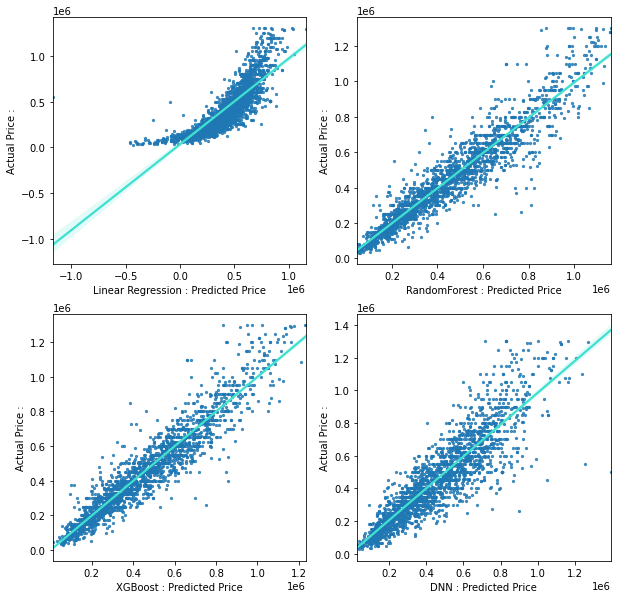

In [146]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.regplot(x='Linear Regression : Predicted Price',y='Actual Price :',data=pred_table,scatter_kws={"s": 5},line_kws={"color": "turquoise"})

plt.subplot(2,2,2)
sns.regplot(x='RandomForest : Predicted Price',y='Actual Price :',data=pred_table,scatter_kws={"s": 5},line_kws={"color": "turquoise"})

plt.subplot(2,2,3)
sns.regplot(x='XGBoost : Predicted Price',y='Actual Price :',data=pred_table,scatter_kws={"s": 5},line_kws={"color": "turquoise"})

plt.subplot(2,2,4)
sns.regplot(x='DNN : Predicted Price',y='Actual Price :',data=pred_table,scatter_kws={"s": 5},line_kws={"color": "turquoise"})

In [133]:
pred_table

Linear Regression : Predicted Price  RandomForest : Predicted Price  \
7305                        389901.303354                   322061.470667   
5367                        732754.692413                   680180.262670   
1443                        571370.758420                   489349.787780   
1928                        848078.630240                   865931.191726   
3807                        155798.833866                   174061.341359   
...                                   ...                             ...   
4563                        672638.004300                   614419.497964   
7608                        482621.946029                   504142.139664   
706                         358650.438672                   363433.736581   
5703                        178995.221349                   129399.313346   
5224                        631573.150244                   659484.938069   

      XGBoost : Predicted Price  DNN : Predicted Price  Actual Price :   
7305               95729.000000          196974.125000           325000  
5367              727153.687500          719364.875000           660000  
1443              513968.468750          403175.156250           450000  
1928              856390.500000          938257.500000           900000  
3807              184276.625000          174006.421875           179000  
...                         ...                    ...              ...  
4563              652264.750000          727109.375000           700000  
7608              487436.031250          428125.937500           455000  
706               398287.750000          384089.000000           320000  
5703              115288.242188          142857.359375            50000  
5224              725781.625000          631105.250000           750000  

[2193 rows x 5 columns]

### Feature Importance
Since RandomForest achieved the highest performance, show the feature importance of RandomForest

In [150]:
import eli5

from eli5.sklearn import PermutationImportance

# Show permutation importance
perm = PermutationImportance(rf_best, random_state=1).fit(x,y)
eli5.show_weights(perm, feature_names = x.columns.tolist())